
<h1 id="Supervised-Learning">Supervised Learning<a class="anchor-link" href="#Supervised-Learning">¶</a></h1><p><a href="https://sphelps.net">


<h2 id="Outline">Outline<a class="anchor-link" href="#Outline">¶</a></h2><ol>
<li>Introduction</li>
<li>Regression methods<ul>
<li>Linear Regression </li>
<li>Penalized Regressions: Lasso, Ridge and Elastic Net </li>
<li>Polynomial regression and kernel methods   </li>
</ul>
</li>
<li>Classification methods    <ul>
<li>Support Vector Machines</li>
<li>Bayesian Classification</li>
<li>K Nearest Neighbors          </li>
</ul>
</li>
<li>Logistic regression</li>


<h2 id="Machine-learning">Machine learning<a class="anchor-link" href="#Machine-learning">¶</a></h2><ul>
<li><p>Nearly all machine-learning problem can be posed as <em>optimisation problems</em> applied to <em>data</em>.</p>
</li>
<li><p>We define a <em>loss function</em>: $L: (\mathbf{x}, F_\mathbf{w}) \rightarrow \mathbb{R}$</p>
</li>
</ul>
<p>where $\mathbf{x}$ is some data, and $F_\mathbf{w}(\mathbf{x})$ is an arbitrary function parameterised by numeric weights $\mathbf{w}$.</p>
<ul>
<li><p>$F$ can be non-linear and/or stochastic.</p>
</li>
<li><p>We minimise the expected loss by choosing appropriate weights:</p>
</li>
</ul>
\begin{equation}
 \underset{\mathbf{w}}{\operatorname{argmin}} E[L(\mathbf{x}, F_\mathbf{w})]
\end{equation}<ul>
<li>In statistical learning we sometimes use the word "coefficient" instead of "weight", but the meaning is identical.</li>
</ul>



<h2 id="Supervised-versus-unsupervised-learning">Supervised versus unsupervised learning<a class="anchor-link" href="#Supervised-versus-unsupervised-learning">¶</a></h2><ul>
<li><p>In a supervised learning problem we have some additional <em>training data</em> $\mathbf{y}$.</p>
</li>
<li><p>The training data provides a finite subset of observed values $\mathbf{y}$ from an unknown function $F$, such that $\mathbf{y} = F(\mathbf{x}) + \epsilon$</p>
</li>
</ul>
<p>where $\epsilon$ are iid. random noise.</p>
<ul>
<li><p>We want to generalise from the training data to derive the complete mapping $F$.</p>
</li>
<li><p>This can then used to generalise to unseen cases where no training data is available.</p>
</li>
<li><p>In a supervised learning problem therefore, our loss function takes the form $L: (\mathbf{x}, \mathbf{y}, \hat{F}_\mathbf{w}) \rightarrow \mathbb{R}$.</p>
</li>
<li><p>Intuitively, we should define a loss function that tells us how good the fit is between the function $\hat{F}$ and the observations of $F$.</p>
</li>
</ul>



<h2 id="Statistical-and-machine-learning">Statistical and machine-learning<a class="anchor-link" href="#Statistical-and-machine-learning">¶</a></h2><ul>
<li><p>Standard methods in statistics can also be viewed as optimisation problems.</p>
</li>
<li><p>For example, in ordinary least-squares estimation (OLS) the loss function is simply the sum of the squared residuals (RSS):</p>
</li>
</ul>
\begin{eqnarray}
L(\mathbf{x}, \mathbf{y}, \mathbf{w}) &amp; = &amp; \sum_{i=1}^n r_i^2 \\
r_i &amp; = &amp; y_i - F_\mathbf{w}(x_i) \\
F_\mathbf{w}(\mathbf{x}) &amp; = &amp; \mathbf{x}^T \mathbf{w}
\end{eqnarray}<ul>
<li><p>In the above, the loss function is a simple linear function.</p>
</li>
<li><p>The OLS loss function is very straightforward to minimize using calculus.</p>
</li>
<li><p>In general, however, machine-learning methods allow us to work with arbitrary <em>non-linear</em> functions.</p>
</li>
</ul>



<h2 id="Practical-machine-learning">Practical machine learning<a class="anchor-link" href="#Practical-machine-learning">¶</a></h2><ul>
<li><p>Machine learning has recently become very practical, because:</p>
</li>
<li><p>we now have very large data sets,</p>
</li>
<li><p>we have very good algorithms for performing <em>automated</em> differentiation of <em>arbitrary</em> functions,</p>
</li>
<li><p>we have heuristic optimization algorithms for minimizing arbitrary functions even when they are not well behaved,</p>
</li>
</ul>



<h2 id="Practical-machine-learning:-GPUs">Practical machine learning: GPUs<a class="anchor-link" href="#Practical-machine-learning:-GPUs">¶</a></h2><p>Graphical-Processing Units GPUs can perform parallel computation on multi-dimensional numerical data using thousands or tens of thousands of cores simultaneously.</p>
<p><img alt="GPU" src="figs/gpu-small.jpg"/></p>



<h2 id="Python-for-machine-learning">Python for machine-learning<a class="anchor-link" href="#Python-for-machine-learning">¶</a></h2><ul>
<li><p>There are many powerful tools for machine-learning which are available in the Python programming language:</p>
<ul>
<li><a href="https://scikit-learn.org/stable/index.html">scikit-learn</a></li>
<li><a href="https://www.tensorflow.org/">TensorFlow</a></li>
<li><a href="https://www.scipy.org/">scipy</a></li>
</ul>
</li>
</ul>



<h2 id="Optimizing-a-simple-function-in-Python">Optimizing a simple function in Python<a class="anchor-link" href="#Optimizing-a-simple-function-in-Python">¶</a></h2>


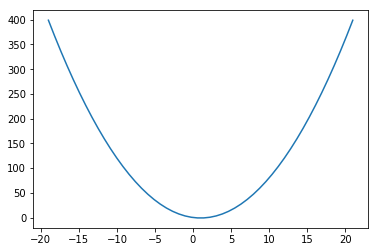

In [2]:
import numpy as np
import matplotlib.pylab as plt

def F(x):
    return x**2 - 2*x

domain = np.linspace(-19., +21.0)
plt.plot(domain, F(domain)); plt.show()


<h3 id="Using-gradient-descent">Using gradient descent<a class="anchor-link" href="#Using-gradient-descent">¶</a></h3>


In [3]:
import scipy.optimize as opt

initial_guess = [20.]
solution = opt.minimize(F, initial_guess)
solution.x

array([1.00000009])


<h2 id="Generating-some-training-data">Generating some training data<a class="anchor-link" href="#Generating-some-training-data">¶</a></h2><ul>
<li>Now suppose we don't simply want to the minimum of $F$, instead we want to find <em>$F$ itself</em>, given some finite noisy observations $\mathbf{y}$.</li>
</ul>


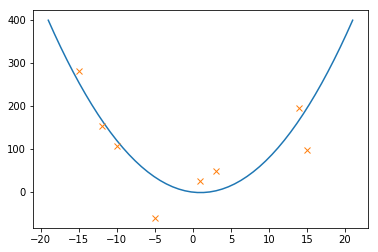

In [4]:
data = np.array([-15, -12, -5, 1., 3., -10, +14, +15])
training_data = np.array([F(x) + np.random.normal(scale=30.) for x in data])
plt.plot(domain, F(domain))
plt.plot(data, training_data, 'x')
plt.show()


<h2 id="Optimising-a-simple-loss-function-in-Python">Optimising a simple loss function in Python<a class="anchor-link" href="#Optimising-a-simple-loss-function-in-Python">¶</a></h2><ul>
<li>Let's assume that $F$ is a polynomial of order 2.</li>
</ul>


In [5]:
def F_hat(x, w):
    (a, b, c) = w
    return a + b*x + c*x**2


<ul>
<li>Now we define our loss function, which in this case is simply the RSS:</li>
</ul>


In [6]:
def L(w):
    predicted_data = np.array([F_hat(x, w) for x in data])
    return np.sum((training_data - predicted_data) ** 2)


<ul>
<li>Finally we optimize the loss function given some initial weights:</li>
</ul>


In [7]:
initial_weights = [0., 0., 0.]
final_weights = opt.minimize(L, initial_weights)
final_weights.x

array([-3.35123236, -2.5881134 ,  0.92571244])


<h3 id="Evaluating-the-model">Evaluating the model<a class="anchor-link" href="#Evaluating-the-model">¶</a></h3>


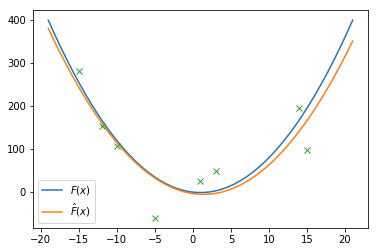

In [8]:
plt.plot(domain, F(domain))
plt.plot(domain, F_hat(domain, final_weights.x))
plt.plot(data, training_data, 'x')
plt.legend(['$F(x)$', '$\hat{F}(x)$'])
plt.show()


<h2 id="Statistical-and-machine-learning-in-finance">Statistical and machine learning in finance<a class="anchor-link" href="#Statistical-and-machine-learning-in-finance">¶</a></h2><ul>
<li><p>Estimating the single-index model to derive alpha and beta.</p>
</li>
<li><p>Estimating default probabilities in credit-risk models.</p>
</li>
<li><p>Solving stochastic-control problems for algorithmic trading.</p>
</li>
<li><p>Time-series forecasting.</p>
</li>
<li><p>Predicting excess returns for portfolio allocation.</p>
</li>
<li><p>Asset rating models.</p>
</li>
</ul>



<h1 id="Regression-methods">Regression methods<a class="anchor-link" href="#Regression-methods">¶</a></h1>



<h2 id="Simple-linear-regression">Simple linear regression<a class="anchor-link" href="#Simple-linear-regression">¶</a></h2><ul>
<li><p>Consider a vector $\mathbf{x}$ containing samples from our predictor, and a vector of $\mathbf{y}$ of corresponding responses, both of size $n$.</p>
</li>
<li><p>We assume a stochastic linear relationship between response and predictor: $y = F(x) = \alpha + \beta x + \epsilon$,</p>
</li>
<li><p>Our weight vector simply consists of our estimated intercept and slope: $\mathbf{w} = (\hat{\alpha}, \hat{\beta})$</p>
</li>
<li><p>Our predictions are given by:</p>
</li>
</ul>
\begin{equation}
\hat{F}_{(\hat{\alpha}, \hat{\beta})} = \hat{\alpha} + \hat{\beta} x
\end{equation}<ul>
<li>The residuals are the differences between our predictions and the observed training response:</li>
</ul>
\begin{equation}
r_i  =  y_i - F_\mathbf{w}(x_i)
\end{equation}<ul>
<li>The loss function $L$ is the residual sum of squares (RSS):</li>
</ul>
\begin{equation}
L(\mathbf{x}, \mathbf{y}, \mathbf{w}) = \sum_{i=1}^n r_i^2 
\end{equation}



<h3 id="Assumptions">Assumptions<a class="anchor-link" href="#Assumptions">¶</a></h3><ol>
<li><p>$F(x)$ is linear.</p>
</li>
<li><p>The noise term is i.d.d. normally distributed with a mean 0 and constant variance:</p>
</li>
</ol>
$$\epsilon \sim N(0, \sigma^2_{\epsilon})$$<ol>
<li>The independent variable is uncorrelated with the noise $E[x_{ij}\epsilon_i] = 0$.</li>
</ol>



<h3 id="Least-squares-estimates">Least squares estimates<a class="anchor-link" href="#Least-squares-estimates">¶</a></h3><ul>
<li>We want to maximise the goodness-of-fit by minimising the expected loss:</li>
</ul>
\begin{equation}
 \underset{\mathbf{w}}{\operatorname{argmin}} E[L(\mathbf{x}, F_\mathbf{w})]
\end{equation}<p>where $\mathbf{w} = (\hat{\alpha}, \hat{\beta})$</p>
<ul>
<li>In this case we can use calculus to obtain a closed-form solution without resorting to computational methods:</li>
</ul>
\begin{eqnarray}
\hat{\beta} &amp; = &amp; \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x}) ^ 2} \\
\hat{\alpha} &amp; = &amp; \bar{y} - \hat{\beta} \bar{x}
\end{eqnarray}<p>where $\bar{x}$ and $\bar{y}$ are the sample means.</p>



<h3 id="Applications-to-Finance---The-Single-Index-Model">Applications to Finance - The Single Index Model<a class="anchor-link" href="#Applications-to-Finance---The-Single-Index-Model">¶</a></h3>$$r_{i,t} - r_f = \alpha_i + \beta_i ( r_{m,t} - r_f) + \epsilon_{i,t}$$$$\epsilon_{i, t} \sim N(0, \sigma_i)$$<ul>
<li>$r_{i,t}$ is return to stock $i$ in period $t$.</li>
<li>$r_f$ is the risk-free rate.</li>
<li>$r_{m,t}$ is the return to the market portfolio.</li>
</ul>
<p>Elton, E. J., &amp; Gruber, M. J. (1997). <em>Modern portfolio theory, 1950 to date</em>. Journal of Banking and Finance, 21(11–12), 1743–1759. <a href="https://doi.org/10.1016/S0378-4266(97)00048-4">https://doi.org/10.1016/S0378-4266(97)00048-4</a></p>



<h4 id="Loading-data-into-a-pandas-dataframe">Loading data into a pandas dataframe<a class="anchor-link" href="#Loading-data-into-a-pandas-dataframe">¶</a></h4><ul>
<li><p>We will first obtain some data from Yahoo finance using the pandas library.</p>
</li>
<li><p>First we will import the functions and modules we need.</p>
</li>
</ul>


In [1]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np


<h4 id="Downloading-price-data-using-as-CSV">Downloading price data using as CSV<a class="anchor-link" href="#Downloading-price-data-using-as-CSV">¶</a></h4><ul>
<li>Here we obtain price data on <a href="http://www.nasdaq.com/symbol/msft">Microsoft Corporation Common Stock</a>, so we specify the symbol MSFT.</li>
</ul>


In [2]:
def prices_from_csv(fname):
    df = pd.read_csv(fname)
    df.set_index(pd.to_datetime(df['Date']), inplace=True)
    return df

In [3]:
msft = prices_from_csv('data/MSFT.csv')
msft.head()

FileNotFoundError: [Errno 2] File data/MSFT.csv does not exist: 'data/MSFT.csv'


<h4 id="Plotting-the-price-of-the-stock">Plotting the price of the stock<a class="anchor-link" href="#Plotting-the-price-of-the-stock">¶</a></h4>


In [ ]:
msft['Adj Close'].plot()
plt.ylabel('MSFT price')
plt.show()


<h4 id="Converting-to-monthly-data">Converting to monthly data<a class="anchor-link" href="#Converting-to-monthly-data">¶</a></h4><ul>
<li><p>We will resample the data at a frequency of one calendar month.</p>
</li>
<li><p>The code below takes the last price in every month.</p>
</li>
</ul>


In [ ]:
daily_prices = msft['Adj Close']


monthly_prices = daily_prices.resample('M').last()
monthly_prices.plot()
plt.ylabel('MSFT Price')
plt.show()




<h4 id="Calculating-log-returns">Calculating log returns<a class="anchor-link" href="#Calculating-log-returns">¶</a></h4>


In [ ]:
stock_returns = pd.DataFrame({'MSFT monthly returns': np.log(monthly_prices).diff().dropna()})
stock_returns.plot()
plt.xlabel('t'); plt.ylabel('$r_t$')
plt.show()


<h4 id="Return-histogram">Return histogram<a class="anchor-link" href="#Return-histogram">¶</a></h4>


In [ ]:
stock_returns.hist()
plt.show()


<h4 id="Descriptive-statistics-of-the-return-distribution">Descriptive statistics of the return distribution<a class="anchor-link" href="#Descriptive-statistics-of-the-return-distribution">¶</a></h4>


In [ ]:
stock_returns.describe()


<h4 id="Summarising-the-distribution-using-a-boxplot">Summarising the distribution using a boxplot<a class="anchor-link" href="#Summarising-the-distribution-using-a-boxplot">¶</a></h4>


In [ ]:
stock_returns.boxplot()
plt.show()


<h4 id="Q-Q-plots">Q-Q plots<a class="anchor-link" href="#Q-Q-plots">¶</a></h4><ul>
<li><p>Quantile-Quantile (Q-Q) plots are a useful way to compare distributions.</p>
</li>
<li><p>We plot empirical quantiles against the quantiles computed the inverted c.d.f. of a specified theoretical distribution.</p>
</li>
</ul>


In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(stock_returns.values[:,0], dist="norm", plot=plt)
plt.show()

NameError: name 'stock_returns' is not defined


<h4 id="The-market-index">The market index<a class="anchor-link" href="#The-market-index">¶</a></h4><ul>
<li>We will first obtain data on the market index: in this case the <a href="http://www.nasdaq.com/">NASDAQ</a>:</li>
</ul>


In [ ]:
nasdaq_index = prices_from_csv('data/^NDX.csv')
nasdaq_index.head()


<h4 id="Converting-to-monthly-data">Converting to monthly data<a class="anchor-link" href="#Converting-to-monthly-data">¶</a></h4><ul>
<li>As before, we can resample to obtain monthly data.</li>
</ul>


In [ ]:
nasdaq_monthly_prices = nasdaq_index['Adj Close'].resample('M').last()
nasdaq_monthly_prices.head()


<h4 id="Plotting-monthly-returns">Plotting monthly returns<a class="anchor-link" href="#Plotting-monthly-returns">¶</a></h4>


In [ ]:
index_log_returns = pd.DataFrame({'NASDAQ monthly returns': np.log(nasdaq_monthly_prices).diff().dropna()})
index_log_returns.plot()
plt.show()


<h4 id="Converting-to-simple-returns">Converting to simple returns<a class="anchor-link" href="#Converting-to-simple-returns">¶</a></h4>


In [ ]:
index_simple_returns = np.exp(index_log_returns) - 1.
index_simple_returns.plot()
plt.show()

In [ ]:
stock_simple_returns = np.exp(stock_returns) - 1.


<h4 id="Concatenating-data-into-a-single-data-frame">Concatenating data into a single data frame<a class="anchor-link" href="#Concatenating-data-into-a-single-data-frame">¶</a></h4><ul>
<li><p>We will now concatenate the data into a single data fame.</p>
</li>
<li><p>We can use <code>pd.concat()</code>, specifying an axis of 1 to merge data along columns.</p>
</li>
<li><p>This is analogous to performing a <code>zip()</code> operation.</p>
</li>
</ul>


In [ ]:
comparison_df = pd.concat([index_simple_returns, stock_simple_returns], axis=1)
comparison_df.head()


<h4 id="Scatter-plots">Scatter plots<a class="anchor-link" href="#Scatter-plots">¶</a></h4><ul>
<li><p>We can produce a scatter plot to see whether there is any relationship between the stock returns, and the index returns.</p>
</li>
<li><p>There are two ways to do this:</p>
<ol>
<li>Use the function <code>scatter()</code> in <code>matplotlib.pyplot</code></li>
<li>Invoke the <code>plot()</code> method on a data frame, passing <code>kind='scatter'</code></li>
</ol>
</li>
</ul>



<h4 id="Scatter-plots-using-the-plot()-method-of-a-data-frame">Scatter plots using the <code>plot()</code> method of a data frame<a class="anchor-link" href="#Scatter-plots-using-the-plot()-method-of-a-data-frame">¶</a></h4><ul>
<li><p>In the example below, the <code>x</code> and <code>y</code> named arguments refer to column numbers of the data frame.</p>
</li>
<li><p>Notice that the <code>plot()</code> method is able to infer the labels automatically.</p>
</li>
</ul>


In [ ]:
comparison_df.plot(x=0, y=1, kind='scatter')
plt.show()


<h4 id="Computing-the-correlation-matrix">Computing the correlation matrix<a class="anchor-link" href="#Computing-the-correlation-matrix">¶</a></h4><ul>
<li>For random variables $X$ and $Y$, the Pearson correlation coefficient is:</li>
</ul>
\begin{eqnarray}
\rho_{X,Y} &amp; = &amp; \frac{\operatorname{cov}(X, Y)}{\sigma_X \sigma_Y} \\
        &amp; = &amp; \frac{E[(X - \mu_x)(Y - \mu_Y)]}{\sigma_X \sigma_Y}\\
\end{eqnarray}



<h4 id="Covariance-and-correlation-of-a-data-frame">Covariance and correlation of a data frame<a class="anchor-link" href="#Covariance-and-correlation-of-a-data-frame">¶</a></h4><ul>
<li>We can invoke the <code>cov()</code> and <code>corr()</code> methods on a data frame.</li>
</ul>


In [ ]:
comparison_df.cov()

In [ ]:
comparison_df.corr()


<h4 id="Comparing-multiple-attributes-in-a-data-frame">Comparing multiple attributes in a data frame<a class="anchor-link" href="#Comparing-multiple-attributes-in-a-data-frame">¶</a></h4><ul>
<li><p>It is often useful to work with more than two variables.</p>
</li>
<li><p>We can add columns (attributes) to our data frame.</p>
</li>
<li><p>Many of the methods we are using will automatically incorporate the additional variables into the analysis.</p>
</li>
</ul>



<h4 id="Using-a-function-to-compute-returns">Using a function to compute returns<a class="anchor-link" href="#Using-a-function-to-compute-returns">¶</a></h4><ul>
<li>The code below defines a function defines a function which will return a data frame containing a single series of returns for the specified symbol, and sampled over the specified frequency.</li>
</ul>


In [ ]:
def returns_df(symbol, frequency='M'):
    df = prices_from_csv('data/%s.csv' % symbol)
    prices = df['Adj Close'].resample(frequency).last()
    column_name = symbol + ' returns (' + frequency + ')'
    return pd.DataFrame({column_name: np.exp(np.log(prices).diff().dropna()) - 1.})                            

In [ ]:
apple_returns = returns_df('AAPL')   
apple_returns.head()


<h4 id="Adding-another-stock-to-the-portfolio">Adding another stock to the portfolio<a class="anchor-link" href="#Adding-another-stock-to-the-portfolio">¶</a></h4>


In [ ]:
comparison_df = pd.concat([comparison_df, apple_returns], axis=1)
comparison_df.head()

In [ ]:
comparison_df.plot()
plt.show()

In [ ]:
comparison_df.corr()


<h4 id="Scatter-matrices">Scatter matrices<a class="anchor-link" href="#Scatter-matrices">¶</a></h4>


In [ ]:
pd.plotting.scatter_matrix(comparison_df, figsize=(8, 6))
plt.show()


<h4 id="Scatter-matrices-with-Kernel-density-plots">Scatter matrices with Kernel-density plots<a class="anchor-link" href="#Scatter-matrices-with-Kernel-density-plots">¶</a></h4><ul>
<li>We can use <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Kernel density estimation (KDE)</a> to plot an approximation of the pdf.</li>
</ul>


In [ ]:
pd.plotting.scatter_matrix(comparison_df, diagonal='kde', figsize=(8, 6))
plt.show()


<h3 id="Ordinary-least-squares-estimation-in-scikit-learn">Ordinary-least squares estimation in scikit-learn<a class="anchor-link" href="#Ordinary-least-squares-estimation-in-scikit-learn">¶</a></h3><ul>
<li>First we import the required modules:</li>
</ul>


In [5]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score


<ul>
<li>Now we prepare the data set:</li>
</ul>


In [ ]:
rr = 0.01 # risk-free rate
ydata = stock_simple_returns - rr
xdata = index_simple_returns - rr


<ul>
<li>Finally we fit the model</li>
</ul>


In [ ]:
regr = skl_lm.LinearRegression()
regr.fit(xdata, ydata)

alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
print(alpha);  print(beta)


<h3 id="Plotting-the-fitted-model">Plotting the fitted model<a class="anchor-link" href="#Plotting-the-fitted-model">¶</a></h3>


In [ ]:
plt.scatter(x=xdata, y=ydata)
plt.plot(xdata, alpha + beta * xdata)
plt.xlabel('index return')
plt.ylabel('stock return')
plt.title('Single-index model fit ')
plt.show()


<h3 id="Plotting-the-residuals">Plotting the residuals<a class="anchor-link" href="#Plotting-the-residuals">¶</a></h3>


In [ ]:
residuals = regr.predict(xdata) - ydata
plt.plot(residuals)
plt.title('residuals plot')
plt.show()


<h3 id="RSS-contours-and-surface">RSS contours and surface<a class="anchor-link" href="#RSS-contours-and-surface">¶</a></h3>


In [ ]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(xdata, with_mean=True, with_std=False).reshape(-1,1)
y = ydata['MSFT monthly returns']

regr.fit(X,y)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-0.15, regr.intercept_+0.15, 50)
B1 = np.linspace(regr.coef_-2.5, regr.coef_+2.5, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j] + X.ravel() * yy[i,j]))**2).sum() / 52.5

# Minimized RSS
min_RSS = r'$\alpha$, $\beta$ for minimized RSS'
min_rss = np.sum((regr.intercept_ + regr.coef_ * X - y.values.reshape(-1,1))**2) / 52.5

In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(15,6))
#fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[0.01, 0.02, 0.03, 0.04, 0.05])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.2f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[0.01, 0.02])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(-1, 3)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\alpha$', fontsize=17)
    ax.set_ylabel(r'$\beta$', fontsize=17)
   # ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()
    
plt.show()


<h2 id="Confidence-intervals-and-standard-error">Confidence intervals and standard error<a class="anchor-link" href="#Confidence-intervals-and-standard-error">¶</a></h2><ul>
<li><p>Notice that the optimal values of $\alpha$ and $\beta$ can be expressed as functions of sample means.</p>
</li>
<li><p>What happens when we use different training data, i.e. different samples of the training data?</p>
</li>
</ul>



<h3 id="Estimation-error">Estimation error<a class="anchor-link" href="#Estimation-error">¶</a></h3><ul>
<li><p>By the law of large numbers $\lim_{n \rightarrow \infty} \bar{\mathbf{x}} = E(X)$.</p>
</li>
<li><p>However, for finite values of $n$ we will have an estimation error.</p>
</li>
<li><p>Can we quantify the estimation error as a function of $n$?</p>
</li>
</ul>



<h3 id="Computing-the-error-numerically">Computing the error numerically<a class="anchor-link" href="#Computing-the-error-numerically">¶</a></h3><ul>
<li><p>If we draw from a standard normal distribution, we know that $E(X) = 0$.</p>
</li>
<li><p>Therefore we can easily compute the estimation error in any given sample.</p>
</li>
</ul>



<h3 id="The-error-for-a-small-random-sample.">The error for a small random sample.<a class="anchor-link" href="#The-error-for-a-small-random-sample.">¶</a></h3><ul>
<li><p>Here $X \sim N(0, 1)$, and we draw a random sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ of size $n=5$.</p>
</li>
<li><p>We will compute $\epsilon_\mathbf{x} = | \bar{\mathbf{x}} - E(X) | = | \bar{\mathbf{x}} |$</p>
</li>
</ul>


In [6]:
x = np.random.normal(size=5)
x

array([ 0.30223606,  1.2483894 , -1.28832977,  1.11715834,  0.18664801])

In [7]:
np.mean(x)

0.31322040749786373

In [8]:
estimation_error = np.sqrt(np.mean(x)**2)
estimation_error

0.31322040749786373


<h3 id="Variance-in-the-error">Variance in the error<a class="anchor-link" href="#Variance-in-the-error">¶</a></h3>



<ul>
<li>If we draw a different sample, will the error be different or the same?</li>
</ul>


In [9]:
x = np.random.normal(size=5)
estimation_error = np.mean(x)**2
estimation_error

0.01171702349311607

In [10]:
x = np.random.normal(size=5)
estimation_error = np.mean(x)**2
estimation_error

0.03023963175168937

In [11]:
x = np.random.normal(size=5)
estimation_error = np.mean(x)**2
estimation_error

0.19454420001429074


<h3 id="Expected-error">Expected error<a class="anchor-link" href="#Expected-error">¶</a></h3>



<ul>
<li><p>The error $\epsilon_{\mathbf{x}}$ is itself a random variable.</p>
</li>
<li><p>How can we compute $E(\epsilon_{\mathbf{x}})$?</p>
</li>
</ul>



<h3 id="Monte-Carlo-estimation-of-the-sampling-error">Monte-Carlo estimation of the sampling error<a class="anchor-link" href="#Monte-Carlo-estimation-of-the-sampling-error">¶</a></h3>


In [12]:
def sampling_error(n):
    errors = [np.sqrt(np.mean(np.random.normal(size=n))**2) \
              for i in range(100000)]
    return np.mean(errors)    

sampling_error(5)

0.35656013206003007


<ul>
<li>Notice that this estimate is relatively stable:</li>
</ul>


In [13]:
sampling_error(5)

0.3557039282930304

In [14]:
sampling_error(5) 

0.3557907867498346


<h3 id="Monte-Caro-estimation-of-the-standard-error">Monte-Caro estimation of the standard error<a class="anchor-link" href="#Monte-Caro-estimation-of-the-standard-error">¶</a></h3><ul>
<li>We can now examine the relationship between sample size $n$ and the expected error using a Monte-Carlo method.</li>
</ul>


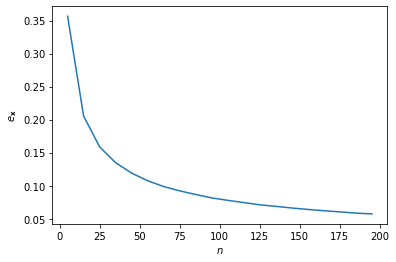

In [15]:
import matplotlib.pyplot as plt
n = np.arange(5, 200, 10)
plt.plot(n, np.vectorize(sampling_error)(n))
plt.xlabel('$n$');  plt.ylabel('$e_\mathbf{x}$')
plt.show()


<h3 id="The-sampling-distribution-of-the-mean">The sampling distribution of the mean<a class="anchor-link" href="#The-sampling-distribution-of-the-mean">¶</a></h3><ul>
<li><p>The variance in the error occurs because the sample mean is a random variable.</p>
</li>
<li><p>What is the distribution of the sample mean?</p>
</li>
</ul>



<h3 id="The-sampling-distribution-of-the-mean">The sampling distribution of the mean<a class="anchor-link" href="#The-sampling-distribution-of-the-mean">¶</a></h3><ul>
<li>Let's fix the sample size at $n=30$, and look at the empirical distribution of the sample means.</li>
</ul>


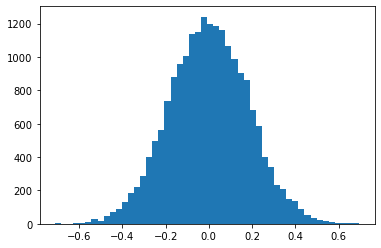

In [16]:
# Sample size
n = 30
# Number of repeated samples
N = 20000

means_30 = [np.mean(np.random.normal(size=n)) for i in range(N)]
ax = plt.hist(means_30, bins=50)
plt.show()


<h3 id="The-sampling-distribution-of-the-mean">The sampling distribution of the mean<a class="anchor-link" href="#The-sampling-distribution-of-the-mean">¶</a></h3><ul>
<li>Now let's do this again for a variable sampled from a <em>different</em> distribution: $X \sim U(0, 1)$.</li>
</ul>


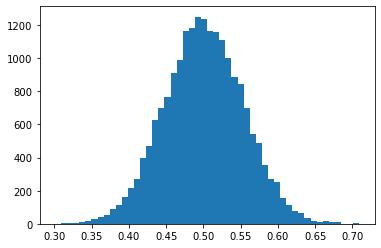

In [17]:
# Sample size
n = 30
# Number of repeated samples
N = 20000
means_30_uniform = [np.mean(np.random.uniform(size=n)) for i in range(N)]
ax = plt.hist(means_30_uniform, bins=50)
plt.show()


<h3 id="Increasing-the-sample-size">Increasing the sample size<a class="anchor-link" href="#Increasing-the-sample-size">¶</a></h3>


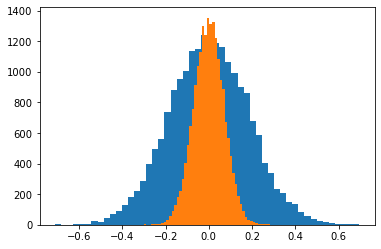

In [18]:
# Sample size
n = 200

means_200 = [np.mean(np.random.normal(size=n)) for i in range(N)]
ax1 = plt.hist(means_30, bins=50)    
ax2 = plt.hist(means_200, bins=50)
plt.show()

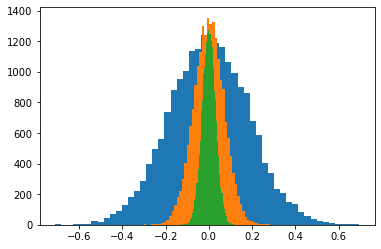

In [19]:
# Sample size
n = 1000
means_1000 = [np.mean(np.random.normal(size=n)) for i in range(N)]
ax1 = plt.hist(means_30, bins=50)    
ax2 = plt.hist(means_200, bins=50)
ax3 = plt.hist(means_1000, bins=50)
plt.show()


<h3 id="The-sampling-distribution-of-the-mean">The sampling distribution of the mean<a class="anchor-link" href="#The-sampling-distribution-of-the-mean">¶</a></h3><ul>
<li><p>In general the sampling distribution of the mean approximates a normal distribution.</p>
</li>
<li><p>If $X \sim N(\mu, \sigma^2)$ then $\bar{\mathbf{x}_n} \sim N(\mu, \frac{\sigma^2}{n})$.</p>
</li>
<li><p>The <em>standard error</em> of the mean is $\sigma_{\bar{\mathbf{x}}} = \frac{\sigma}{\sqrt{n}}$.</p>
</li>
<li><p>Therefore sample size must be quadrupled to achieve half the error.</p>
</li>
</ul>



<h2 id="Errors-in-simple-regression">Errors in simple regression<a class="anchor-link" href="#Errors-in-simple-regression">¶</a></h2><ul>
<li><p>Let's perform a similar simulation experiment for OLS.</p>
</li>
<li><p>We will generate some simulated data from the function $F(x) = 2 + 3x + \epsilon$.</p>
</li>
</ul>


In [20]:
n = 20

def noise(size=n):
    return np.random.normal(size=(size, 1), scale=5.0)

def F(x):
    return 2 + 3*x 

def F_noise(x):
    return F(x) + noise(len(x))


<h3 id="First-sample">First sample<a class="anchor-link" href="#First-sample">¶</a></h3>


In [22]:
xdata = np.random.uniform(size=(n, 1), low=-8., high=+8.)
ydata = F_noise(xdata)
regr = skl_lm.LinearRegression()
regr.fit(xdata, ydata)
alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
print(alpha);  print(beta)

1.642420706251706
3.0552559965405663



<h3 id="Second-sample">Second sample<a class="anchor-link" href="#Second-sample">¶</a></h3>


In [23]:
xdata = np.random.uniform(size=(n, 1), low=-8., high=+8.)
ydata = F_noise(xdata)
regr = skl_lm.LinearRegression()
regr.fit(xdata, ydata)
alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
print(alpha);  print(beta)

2.3194865384370655
2.965875701867936



<h3 id="Regression-plots-for-different-training-sets">Regression plots for different training sets<a class="anchor-link" href="#Regression-plots-for-different-training-sets">¶</a></h3>


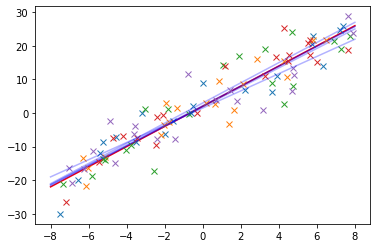

In [24]:
plt.figure()
domain = np.linspace(-8, 8.)
plt.plot(domain, F(domain), color='red')
for i in range(5):
    xdata = np.random.uniform(size=(20, 1), low=-8., high=+8.)
    ydata = F_noise(xdata)
    plt.plot(xdata, ydata, 'x')
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
    plt.plot(domain, alpha + beta * domain, color='blue', alpha=0.3)
plt.show()   


<h3 id="The-distribution-of-the-estimates">The distribution of the estimates<a class="anchor-link" href="#The-distribution-of-the-estimates">¶</a></h3>


In [25]:
domain = np.linspace(-8, 8.)
num_experiments = 10000; results = np.zeros((num_experiments, 2))
for i in range(num_experiments):
    xdata = np.random.uniform(size=(n, 1), low=-8., high=+8.)
    ydata = F_noise(xdata)
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
    results[i, 0] = alpha;  results[i, 1] = beta

In [29]:
print (results)

[[2.23715473 2.73423658]
 [2.84481862 3.33877566]
 [1.06434277 2.82663063]
 ...
 [3.69954616 3.02820171]
 [4.11258572 3.05502981]
 [0.6256662  3.12803704]]


In [30]:
pd.DataFrame(results, columns=['$\\alpha$', '$\\beta$']).describe()

,$\alpha$,$\beta$
count,10000.000000,10000.000000
mean,2.003860,3.004086
std,1.139815,0.253460
min,-2.019178,1.909462
25%,1.238947,2.837807
50%,1.998437,3.005890
75%,2.768708,3.173130
max,6.551488,3.953136



<h3 id="Quantifying-the-variance-of-a-model">Quantifying the <em>variance of a model</em><a class="anchor-link" href="#Quantifying-the-variance-of-a-model">¶</a></h3><ul>
<li><p>We can quantify the goodness-of-fit of our model when we train it on different data sets.</p>
</li>
<li><p>Consider some out-of-sample data $x_0 = 10$ and $y_0 = f(x_0) + \epsilon$.</p>
</li>
<li><p>Over the different training sets, we can estimate:</p>
<ul>
<li>the variance of our forecasts: $\operatorname{Var}(\hat{f}(x_0))$,</li>
<li>the expected squared-error $E(y_0 - \hat{f}(x_0))^2$.</li>
</ul>
</li>
</ul>



<h3 id="Estimating-MSE-and-variance-using-Monte-Carlo">Estimating MSE and variance using Monte-Carlo<a class="anchor-link" href="#Estimating-MSE-and-variance-using-Monte-Carlo">¶</a></h3>


In [31]:
domain = np.linspace(-8, 8.); 
out_of_sample_data = np.array([10.])
num_experiments = 50000; results = np.zeros((num_experiments, 2))
for i in range(num_experiments):
    xdata = np.random.uniform(size=(n, 1), low=-8., high=+8.)
    ydata = F_noise(xdata)
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
    prediction = alpha + beta * out_of_sample_data
    squared_error = (F_noise(out_of_sample_data) - prediction) ** 2
    results[i] = [squared_error, prediction]


<h3 id="The-relationship-between-error-and-variance">The relationship between error and variance<a class="anchor-link" href="#The-relationship-between-error-and-variance">¶</a></h3>


In [32]:
mean_squared_error = np.mean(results[:,0])
mean_squared_error

32.74892918802504

In [33]:
prediction_variance = np.var(results[:,1])
prediction_variance

7.833350861678941

In [34]:
noise_variance = np.var(noise(size=50000))
noise_variance

25.119853685100384

In [35]:
noise_variance + prediction_variance

32.953204546779325


<h2 id="Fitting-a-biased-model">Fitting a biased model<a class="anchor-link" href="#Fitting-a-biased-model">¶</a></h2><ul>
<li><p>In the previous example we fitted a linear model to linear data.</p>
</li>
<li><p>Let's see what happens if we attempt to fit a linear model to non-linear data.</p>
</li>
</ul>


In [36]:
def F(x):
    return 2 + 3*x + 0.2*x**2

def F_noise(x):
    return F(x) + noise(len(x))


<h3 id="Regression-plots-for-different-training-sets">Regression plots for different training sets<a class="anchor-link" href="#Regression-plots-for-different-training-sets">¶</a></h3>


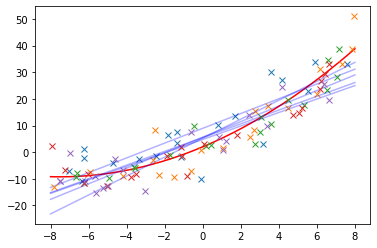

In [37]:
plt.figure()
domain = np.linspace(-8, 8.)
plt.plot(domain, F(domain), color='red')
for i in range(5):
    xdata = np.random.uniform(size=(20, 1), low=-8., high=+8.)
    ydata = F_noise(xdata)
    plt.plot(xdata, ydata, 'x')
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
    plt.plot(domain, alpha + beta * domain, color='blue', alpha=0.3)
plt.show()   


<h3 id="Estimating-error-and-variance">Estimating error and variance<a class="anchor-link" href="#Estimating-error-and-variance">¶</a></h3>


In [38]:
domain = np.linspace(-8, 8.)
out_of_sample_data = np.array([10.])
num_experiments = 50000; results = np.zeros((num_experiments, 2))
for i in range(num_experiments):
    xdata = np.random.uniform(size=(n, 1), low=-8., high=+8.)
    ydata = F_noise(xdata)
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]; beta = regr.coef_[0][0]
    prediction = alpha + beta * out_of_sample_data
    squared_error = (F_noise(out_of_sample_data) - prediction) ** 2
    results[i] = [squared_error, prediction]


<h3 id="Results">Results<a class="anchor-link" href="#Results">¶</a></h3>


In [39]:
mean_squared_error = np.mean(results[:,0])
mean_squared_error

295.29044416473397

In [40]:
prediction_variance = np.var(results[:,1])
prediction_variance

15.510077287021177

In [42]:
noise_variance = np.var(noise(size=50000))
noise_variance

25.14380260485566

In [41]:
noise_variance + prediction_variance

40.629930972121564


<h2 id="The-bias-variance-trade-off">The bias-variance trade-off<a class="anchor-link" href="#The-bias-variance-trade-off">¶</a></h2><ul>
<li><p>The additional source of error in the previous example is called the bias.</p>
</li>
<li><p>Bias arises when our model is of the wrong form to be able to fully fit the data.</p>
</li>
<li><p>In general:</p>
</li>
</ul>
\begin{equation}
E[y_0 - \hat{f}(x)]^2 = \operatorname{Var}[\hat{f}(x)] + \operatorname{Bias}[\hat{f}(x)]^2 + \operatorname{Var}[\epsilon]
\end{equation}<p>where</p>
\begin{equation}
\operatorname{Bias}[\hat{f}(x)] = E[\hat{f}(x)] - f(x)
\end{equation}


In [43]:
bias = np.sqrt(mean_squared_error - (noise_variance + prediction_variance))
bias

15.957335751085052


<h2 id="Improving-the-fit-the-model">Improving the fit the model<a class="anchor-link" href="#Improving-the-fit-the-model">¶</a></h2><ul>
<li><p>We cannot eliminate the final term in the previous equation; $\operatorname{Var}(\epsilon)$ is <em>irreducible error</em>.</p>
</li>
<li><p>In general, if we reduce bias, we increase variance.</p>
</li>
<li><p>This is called the bias-variance trade-off.</p>
</li>
<li><p>We can reduce variance by reducing the number of weights in $\mathbf{w}$.</p>
</li>
<li><p>In multiple regression this can be done by reducing the number of predictors.</p>
</li>
<li><p>Correspondingly as we increase the number of predictors we increase variance, but reduce bias.</p>
</li>
<li><p>This can result in <em>over-fitting</em> to the training data.</p>
</li>
</ul>



<h3 id="Bias-variance-tradeoff-example:-test-function-and-data">Bias-variance tradeoff example: test function and data<a class="anchor-link" href="#Bias-variance-tradeoff-example:-test-function-and-data">¶</a></h3>



<h3 id="Bias-variance-trade-off-example:-spread=5">Bias-variance trade-off example: spread=5<a class="anchor-link" href="#Bias-variance-trade-off-example:-spread=5">¶</a></h3>



<h3 id="Bias-variance-trade-off-example:-spread=1">Bias-variance trade-off example: spread=1<a class="anchor-link" href="#Bias-variance-trade-off-example:-spread=1">¶</a></h3>



<h3 id="Bias-variance-trade-off-example:-spread=0.1">Bias-variance trade-off example: spread=0.1<a class="anchor-link" href="#Bias-variance-trade-off-example:-spread=0.1">¶</a></h3>



<h2 id="Bias-variance-trade-off-as-multi-objective-optimization">Bias-variance trade-off as multi-objective optimization<a class="anchor-link" href="#Bias-variance-trade-off-as-multi-objective-optimization">¶</a></h2><p></p>



<h3 id="Basis-Functions">Basis Functions<a class="anchor-link" href="#Basis-Functions">¶</a></h3><ul>
<li><p>We can use non-linear basis functions to decrease the bias of our model.</p>
</li>
<li><p>We transform a variable $X$ into $b_1(X), b_2(X), \ldots, b_K(X)$</p>
</li>
<li><p>We then fit the model:</p>
</li>
</ul>
\begin{equation}
y_i = \beta_0 + \beta_1 b_1(x_i) + \beta_2 b_2(x_i) + \beta_3 b_3(x_i) + \ldots + \beta_Kb_K(x_i) + \epsilon_i
\end{equation}<ul>
<li><p>The basis functions are known and chosen.</p>
</li>
<li><p>The above equation is still linear in the basis functions.</p>
</li>
</ul>



<h2 id="Multiple-linear-regression">Multiple linear-regression<a class="anchor-link" href="#Multiple-linear-regression">¶</a></h2><ul>
<li><p>Simple regression can be generalized to multiple predictors.</p>
</li>
<li><p>Consider $p$ distinct predictors with corresponding observations of size $n$: $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_p$, then:</p>
</li>
</ul>
\begin{equation}
\mathbf{y} = \beta_0 + \beta_1 \mathbf{x}_1 + \beta_2 \mathbf{x}_2 + \ldots + \beta_p \mathbf{x}_p + \epsilon
\end{equation}<ul>
<li>In matrix notation:</li>
</ul>
\begin{equation}
\mathbf{y} = \mathbf{X} \mathbf{w} + \mathbf{\epsilon}
\end{equation}\begin{equation}
\begin{pmatrix}
Y_1 \\
Y_2 \\
\vdots \\
Y_n
\end{pmatrix} = 
\begin{pmatrix}
1 &amp; X_{11} &amp; X_{21} &amp; \ldots &amp; X_{p1} \\
1 &amp; X_{12} &amp; X_{21} &amp; \ldots &amp; X_{p2} \\
\vdots &amp; \vdots &amp; \vdots &amp; \ldots &amp; \vdots \\
1 &amp; X_{1n} &amp; X_{2n} &amp; \ldots &amp; X_{pn} \\
\end{pmatrix}
\begin{pmatrix}
\beta_1 \\
\beta_2 \\
\vdots  \\
\beta_n \\
\end{pmatrix} + 
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{pmatrix}
\end{equation}<ul>
<li>The <a href="https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf">closed-form solution</a> to the loss-minimization problem is:</li>
</ul>
\begin{equation}
\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}



<h3 id="Applications-to-Finance:-factor-models">Applications to Finance: factor models<a class="anchor-link" href="#Applications-to-Finance:-factor-models">¶</a></h3><p>Fama-French 3-factor model:</p>
\begin{equation}
r_i - r_f = \beta_{0} + \beta_{1} ( r_m - r_f) + \beta_{2} s_i + \beta_{3} v_i + \epsilon_{i,t}
\end{equation}<ul>
<li>$r_i$ is the return for stock $i$.</li>
<li>$s_i$ is the size of stock $i$.</li>
<li>$v_i$ is the value of stock $i$.</li>
<li>$r_f$ is the risk-free rate.</li>
<li>$r_m$ is the return to the market portfolio.</li>
</ul>
<p>Fama, Eugene F., and Kenneth R. French. "Common risk factors in the returns on stocks and bonds." Journal of Financial Economics 33:1 (1993). <a href="https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.139.5892&amp;rep=rep1&amp;type=pdf">https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.139.5892&amp;rep=rep1&amp;type=pdf</a></p>



<h3 id="Polynomial-regression">Polynomial regression<a class="anchor-link" href="#Polynomial-regression">¶</a></h3><ul>
<li>For polynomial regression we use:</li>
</ul>
\begin{equation}
b_j(x_i) = x_i^{j-1}
\end{equation}<ul>
<li>For $K=2$ the simple linear regression model becomes:</li>
</ul>
\begin{equation}
y = \beta_0 + \beta_1 x + \beta_2 x^2
\end{equation}<ul>
<li>Note that we have <em>introduced an additional feature</em> into our model.</li>
</ul>



<h3 id="Polynomial-basis-functions-in-scikit-learn">Polynomial basis functions in scikit-learn<a class="anchor-link" href="#Polynomial-basis-functions-in-scikit-learn">¶</a></h3>


In [44]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())


<h4 id="Plotting-the-fitted-model">Plotting the fitted model<a class="anchor-link" href="#Plotting-the-fitted-model">¶</a></h4>



<ul>
<li>Here we use polynomial basis functions with $K=7$ to fit $y = \sin(x) + \epsilon$.</li>
</ul>


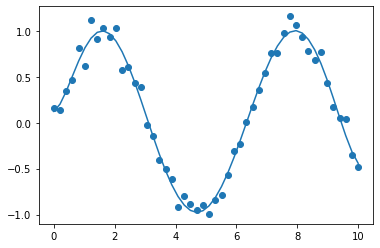

In [46]:
rng = np.random.RandomState(1)
x = np.linspace(0, 10.)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = x
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


<h2 id="Overfitting">Overfitting<a class="anchor-link" href="#Overfitting">¶</a></h2><ul>
<li><p>Let's see what happens if we fit a polynomial model to linear data.</p>
</li>
<li><p>We see that the model has simply fitted to the noise; it has over-fitted to the training data.</p>
</li>
</ul>


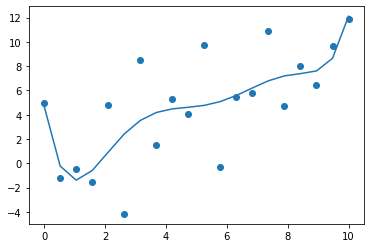

In [47]:
rng = np.random.RandomState(1)
x = np.linspace(0, 10., 20)
y = 0.1 + x + rng.randn(20)*3.
poly_model.fit(x[:, np.newaxis], y)
xfit = x
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);


<h2 id="Model-validation">Model validation<a class="anchor-link" href="#Model-validation">¶</a></h2><ul>
<li><p>It is very important to test for over-fitting, particularly with high-variance models.</p>
</li>
<li><p>To test for over-fitting we hold back some data from the training.</p>
</li>
<li><p>We divide data into two subsets:</p>
<ol>
<li>training data</li>
<li>validation data</li>
</ol>
</li>
<li><p>We validate the model by estimating the MSE on the validation data.</p>
</li>
<li><p>This is also called <em>out-of-sample validation</em>.</p>
</li>
</ul>



<h2 id="Cross-validation">Cross-validation<a class="anchor-link" href="#Cross-validation">¶</a></h2><ul>
<li><p>In cross-validation we create multiple partitions of the data</p>
</li>
<li><p>Each way of paritition data is called a round.</p>
</li>
<li><p>We take an average of the error across rounds.</p>
</li>
</ul>



<h3 id="Leave-one-out-cross-validation">Leave-one-out cross-validation<a class="anchor-link" href="#Leave-one-out-cross-validation">¶</a></h3><p>


<h3 id="k-fold-cross-validation">k-fold cross-validation<a class="anchor-link" href="#k-fold-cross-validation">¶</a></h3><p>



<h3 id="Validating-the-single-index-model">Validating the single-index model<a class="anchor-link" href="#Validating-the-single-index-model">¶</a></h3>



<ul>
<li>Let's perform model validation with the data we used to train the single-index model:</li>
</ul>


In [ ]:
rr = 0.01 # risk-free rate
ydata = stock_simple_returns - rr
xdata = index_simple_returns - rr


<ul>
<li>We first partition the data into chunks of equal size $n$:</li>
</ul>


In [ ]:
def in_subset(data, i, n=10):
    return data[i*n:(i+1)*n]


<h3 id="The-first-subset">The first subset<a class="anchor-link" href="#The-first-subset">¶</a></h3>


In [ ]:
in_subset(xdata, 0, n=5)


<h3 id="The-second-subset">The second subset<a class="anchor-link" href="#The-second-subset">¶</a></h3>


In [ ]:
in_subset(xdata, 1, n=5)


<h3 id="The-third-subset">The third subset<a class="anchor-link" href="#The-third-subset">¶</a></h3>


In [ ]:
in_subset(xdata, 2, n=5)


<h3 id="The-remaining-data">The remaining data<a class="anchor-link" href="#The-remaining-data">¶</a></h3>


In [ ]:
def out_subset(data, i, size=10):
    return pd.concat([data[:i*size], data[(i+1)*size:]])


<h3 id="Model-fitting">Model fitting<a class="anchor-link" href="#Model-fitting">¶</a></h3><ul>
<li>Here we fit the model to given data, returning a function that can
later be applied to make a prediction.</li>
</ul>


In [ ]:
def fit_model(xdata, ydata):
    regr = skl_lm.LinearRegression()
    regr.fit(xdata, ydata)
    alpha = regr.intercept_[0]
    beta = regr.coef_[0][0]
    return lambda x: alpha + beta*x


<h3 id="Leave-one-out-cross-validation-in-Python">Leave-one-out cross-validation in Python<a class="anchor-link" href="#Leave-one-out-cross-validation-in-Python">¶</a></h3>


In [ ]:
n = 10; N = int(np.floor(len(xdata) / n)); mse = np.zeros(N)
for i in range(N):
    test_data_x = in_subset(xdata, i)
    test_data_y = in_subset(ydata, i)
    training_data_x = out_subset(xdata, i)
    training_data_y = out_subset(ydata, i)
    model = fit_model(training_data_x, training_data_y)
    predicted_ydata = model(test_data_x)
    mse[i] = np.mean((test_data_y.values - predicted_ydata.values)**2)
mse

In [ ]:
np.mean(mse)


<h3 id="Potential-problems-with-linear-regression">Potential problems with linear-regression<a class="anchor-link" href="#Potential-problems-with-linear-regression">¶</a></h3><h4 id="Non-linearity-of-the-response-predictor-relationships.">Non-linearity of the response-predictor relationships.<a class="anchor-link" href="#Non-linearity-of-the-response-predictor-relationships.">¶</a></h4><ul>
<li>If the actual relationship between response and predictor is non-linear then linear regression with give a very biased result.</li>
</ul>



<h4 id="Correlation-or-non-constant-variance-in-error-terms.">Correlation or non-constant variance in error terms.<a class="anchor-link" href="#Correlation-or-non-constant-variance-in-error-terms.">¶</a></h4><ul>
<li><p>We assume that the $\epsilon$ variate is i.i.d.</p>
</li>
<li><p>If there are correlations in $\epsilon$, linear regression can give misleading results.</p>
</li>
<li><p>This often occurs in time-series data.</p>
</li>
<li><p>Similarly if the variance of the residuals is not constant.</p>
</li>
<li><p>As we saw with the single-index model fit, we can examine the plot of the residuals for patterns.</p>
</li>
</ul>



<h4 id="Outliers-and-high-leverage-points">Outliers and high-leverage points<a class="anchor-link" href="#Outliers-and-high-leverage-points">¶</a></h4><ul>
<li><p>Extreme values of response variables are called outliers.</p>
</li>
<li><p>They can be analyzed using box-plots.</p>
</li>
<li><p>Outliers can cause over-fitting.</p>
</li>
<li><p>Extreme values of predictor variables are called high-leverage points.</p>
</li>
</ul>



<h4 id="Collinearity.">Collinearity.<a class="anchor-link" href="#Collinearity.">¶</a></h4><ul>
<li><p>We assume there are no linear relationships between predictors.</p>
</li>
<li><p>If there are, then we are using redundant information, which can make the model hard to interpret.</p>
</li>
<li><p>Collinearity can be detected by looking at scatter matrices.</p>
</li>
<li><p>In general, combinations of variables can exhibit a linear relationship, which is called <em>multi-collinearity</em>.</p>
</li>
<li><p>Multi-collinearity can be detected by computing the <a href="https://etav.github.io/python/vif_factor_python.html">Variable Inflation Factor (VIF)</a>.</p>
</li>
<li><p>If there are redundant variables, then typically we want to omit them from the regression.</p>
</li>
<li><p>Finding the correct set of predictor variables is called <em>variable selection</em>.</p>
</li>
</ul>



<h2 id="Variable-selection-and-regularization">Variable-selection and regularization<a class="anchor-link" href="#Variable-selection-and-regularization">¶</a></h2><ul>
<li><p>We can address some of these issues using penalized regression techniques.</p>
</li>
<li><p>Penalized regression can be used to reduce the variance of a model through regularization.</p>
</li>
<li><p>It can also be used to eliminate redundant variables.</p>
</li>
<li><p>This is particularly important for "big-data" problems with large numbers of predictor variables $p$;</p>
<ul>
<li>for an example in Finance, see the <a href="https://wrds-www.wharton.upenn.edu/pages/grid-items/financial-ratios-firm-level/">WRDS database</a>.</li>
</ul>
</li>
<li><p>Provided the number of observations is significantly greater that the number of preditors $n &gt; p$, ordinary least squares estimation can give low-variance estimates.</p>
<ul>
<li>If $n &lt; p$ there is no single optimal solution to the OLS optimization problem.</li>
</ul>
</li>
</ul>



<h3 id="Shrinkage-using-Ridge-regression">Shrinkage using Ridge regression<a class="anchor-link" href="#Shrinkage-using-Ridge-regression">¶</a></h3><ul>
<li>Recall that in linear regression our loss function $L$ 
is simply the residual sum of squares (RSS):</li>
</ul>
\begin{equation}
\operatorname{RSS} = \sum_{i=1}^n r_i^2 
\end{equation}<p>where</p>
\begin{eqnarray}
r_i  &amp; = &amp;  y_i - F_\mathbf{w}(x_i) \\
    &amp; = &amp; y_i - w_0 - \sum_{j=1}^p w_j x_{ij}
\end{eqnarray}<ul>
<li>In <em>ridge regression</em> we add an additional <em>shrinkage penalty</em> term:</li>
</ul>
\begin{equation}
L(\mathbf{x}, \mathbf{y}, \mathbf{w}) = \operatorname{RSS} + \lambda \sum_{j=1}^p w_j^2
\end{equation}<p>where $\lambda$ is a tunable <em>hyper-parameter</em>.</p>
<p>The optimal weights are:</p>
\begin{equation}
w^* = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}



<h3 id="Ridge-regression-in-Python">Ridge regression in Python<a class="anchor-link" href="#Ridge-regression-in-Python">¶</a></h3><ul>
<li>In scikit-learn you can perform ridge regression simply by using the <code>Ridge()</code> function instead of the <code>LinearRegression()</code> function:</li>
</ul>


In [48]:
from sklearn.linear_model import Ridge


<h3 id="The-$\mathscr{l_2}$-norm">The $\mathscr{l_2}$ norm<a class="anchor-link" href="#The-$\mathscr{l_2}$-norm">¶</a></h3><ul>
<li>The $\mathscr{l_2}$ norm of a vector gives its Euclidian distance from the origin:</li>
</ul>
\begin{equation}
||\mathbf{w}||_2 = \sqrt{\sum_{j=1}^p {w_j}^2}
\end{equation}<ul>
<li>As $\lambda$ increases $||\hat{\mathbf{w}}_{\lambda}||_2$ decreases.</li>
</ul>


In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glmnet_python
from glmnet import glmnet

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

df = pd.read_csv('data/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
y = df.Salary
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [ ]:
X_train = pd.read_csv('data/Hitters_X_train.csv', index_col=0)
y_train = pd.read_csv('data/Hitters_y_train.csv', index_col=0)
X_test = pd.read_csv('data/Hitters_X_test.csv', index_col=0)
y_test = pd.read_csv('data/Hitters_y_test.csv', index_col=0)

In [ ]:
alphas = 10**np.linspace(6,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('$\mathbf{w}$')
plt.title('Ridge coefficients as a function of the regularization');


<h3 id="Scaling-and-standardization">Scaling and standardization<a class="anchor-link" href="#Scaling-and-standardization">¶</a></h3><ul>
<li><p>The ridge penalty term is not scale equivariant.</p>
</li>
<li><p>Therefore when using penalised regression we must use standardized  predictors:</p>
</li>
</ul>
\begin{equation}
    \tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n (x_ij - \bar{x}_j)^2}}
\end{equation}<ul>
<li>In scikit-learn you can use the <code>scale()</code> function:</li>
</ul>


In [49]:
from sklearn.preprocessing import scale 


<h2 id="Shrinkage,-bias-and-variance">Shrinkage, bias and variance<a class="anchor-link" href="#Shrinkage,-bias-and-variance">¶</a></h2><ul>
<li><p>Shrinkage reduces variance.</p>
</li>
<li><p>Therefore it increases bias.</p>
</li>
<li><p>Therefore there exist optimal values of $\lambda$ which minimize out-of-sample MSE.</p>
</li>
<li><p>This hyper-parameter can be tuned by using cross-validation methods to find the optimal value.</p>
</li>
</ul>



<h2 id="Lasso-regression">Lasso regression<a class="anchor-link" href="#Lasso-regression">¶</a></h2><ul>
<li>The lasso regression uses an $\mathscr{l_1}$ penalty term:</li>
</ul>
\begin{equation}
L(\mathbf{x}, \mathbf{y}, \mathbf{w}) = \operatorname{RSS} + \lambda \sum_{j=1}^p |w_j|
\end{equation}<ul>
<li><p>In contrast to ridge regression, the lasso does not shrink all coefficients to zero for the same $\lambda$.</p>
</li>
<li><p>This means that it can be used for <em>variable selection</em>.</p>
</li>
</ul>


In [ ]:
import warnings; warnings.simplefilter('ignore')

alphas = 10**np.linspace(6,-2,100)*0.5

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('$\mathbf{w}$')
plt.title('Lasso coefficients as a function of the regularization');


<h3 id="Penalized-regression-as-constrained-optimization">Penalized regression as constrained optimization<a class="anchor-link" href="#Penalized-regression-as-constrained-optimization">¶</a></h3><ul>
<li><p>An alternative formulation of penalized regression is to view it as constrained optimization.</p>
</li>
<li><p>We minimize the standard OLS loss function:</p>
</li>
</ul>
<p>$L(\mathbf{x}, \mathbf{y}, \mathbf{w}) = \operatorname{RSS}$</p>
<ul>
<li>For ridge regression we use the constraint:</li>
</ul>
$$\sum_{j=1}^p w_{j}^2 \leq s$$<ul>
<li>For lasso regression we use the constraint:</li>
</ul>
$$\sum_{j=1}^p |w_{j}| \leq s$$<ul>
<li>For every $\lambda$ there is a corresponding constant budget $s$ for which solutions to the constrained and unconstrained problem are identical.</li>
</ul>



<h3 id="Error-contours-and-contraints-for-the-ridge-penalty">Error contours and contraints for the ridge penalty<a class="anchor-link" href="#Error-contours-and-contraints-for-the-ridge-penalty">¶</a></h3><p><img alt="ridge" src="figs/Ridge-Regression.png"/></p>



<h3 id="Error-contours-and-contraints-for-the-lasso-penalty">Error contours and contraints for the lasso penalty<a class="anchor-link" href="#Error-contours-and-contraints-for-the-lasso-penalty">¶</a></h3><p><img alt="lasso" src="figs/Lasso-Regression.png"/></p>



<h2 id="Lasso-and-Ridge-comparision">Lasso and Ridge comparision<a class="anchor-link" href="#Lasso-and-Ridge-comparision">¶</a></h2><ul>
<li><p>Lasso is able to perform variable-selection when the data-set contains many redundant features that do not influence the response.</p>
</li>
<li><p>Ridge works when most predictors impact the response.</p>
</li>
<li><p>In practice we don't know the true model, so how should we select the penalization?</p>
</li>
</ul>



<h2 id="Elastic-net">Elastic-net<a class="anchor-link" href="#Elastic-net">¶</a></h2><ul>
<li><p>We can combine both penalties into a single term by using a linear combination.</p>
</li>
<li><p>This transforms the problem into a multi-objective optimisation problem (MOO).</p>
</li>
<li><p>The parameter $\alpha$ specifies the weighting towards a given objective.</p>
</li>
</ul>
\begin{equation}
L(\mathbf{x}, \mathbf{y}, \mathbf{w}) = \operatorname{RSS} + \lambda \left( \frac{1 - \alpha}{2} \sum_{j=1}^p |w_j| + \alpha  \sum_{j=1}^p w_j^2 \right)
\end{equation}



<h3 id="Penalized-regression-in-Finance">Penalized regression in Finance<a class="anchor-link" href="#Penalized-regression-in-Finance">¶</a></h3><ul>
<li><p>Bianchi and McAlinn (2020) attempt to predict monthly excess returns based on 70 predictors.</p>
</li>
<li><p>The predictors are financial ratios taken from the <a href="https://wrds-www.wharton.upenn.edu/pages/grid-items/financial-ratios-firm-level/">WRDS database</a>.</p>
</li>
</ul>
<p>Bianchi, D., &amp; McAlinn, K. (2020). Divide and Conquer: Financial Ratios and Industry Returns Predictability (No. 3136368; SSRN). <a href="https://doi.org/10.2139/ssrn.3136368">https://doi.org/10.2139/ssrn.3136368</a></p>
<h3 id="Predictor-categories">Predictor categories<a class="anchor-link" href="#Predictor-categories">¶</a></h3><ul>
<li>The predictors are grouped into seven categories:<ol>
<li>Capitalization</li>
<li>Efficiency</li>
<li>Financial Soundness/Solvency</li>
<li>Liquidity</li>
<li>Profitability</li>
<li>Valuation </li>
<li>Other</li>
</ol>
</li>
</ul>



<h4 id="Example-predictors">Example predictors<a class="anchor-link" href="#Example-predictors">¶</a></h4><ul>
<li>Gross profitability as a fraction of total assets,</li>
<li>Net Income as a fraction of average of Common Equity based on most recent two periods,</li>
</ul>
<p>$\ldots$</p>
<p>(Bianchi and McAlinn 2020, p. 70)</p>



<h4 id="Annualized-certainty-equivalent-by-method">Annualized certainty-equivalent by method<a class="anchor-link" href="#Annualized-certainty-equivalent-by-method">¶</a></h4><table>
<thead><tr>
<th>Method</th>
<th>Durables</th>
<th>NonDurables</th>
<th>Manuf</th>
<th>Energy</th>
<th>HiTech</th>
<th>Health</th>
<th>Other</th>
<th>Shops</th>
<th>Telecomm</th>
<th>Utils</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>OLS</td>
<td>-1.660</td>
<td>-0.527</td>
<td>-1.072</td>
<td>-0.874</td>
<td>-0.856</td>
<td>-0.353</td>
<td>-0.898</td>
<td>-0.163</td>
<td>-0.411</td>
<td>-0.227</td>
<td>-0.729</td>
<td>-1.409</td>
</tr>
<tr>
<td>Lasso</td>
<td>-0.478</td>
<td>-0.425</td>
<td>-0.291</td>
<td>-0.734</td>
<td>-0.182</td>
<td>-0.081</td>
<td>-0.135</td>
<td>-0.753</td>
<td>-0.057</td>
<td>-0.248</td>
<td>-0.001</td>
<td>-0.567</td>
</tr>
<tr>
<td>Ridge</td>
<td>0.151</td>
<td>-0.256</td>
<td>-0.138</td>
<td>-1.027</td>
<td>-0.138</td>
<td>-0.328</td>
<td>-0.187</td>
<td>-0.097</td>
<td>-0.188</td>
<td>-0.202</td>
<td>-0.718</td>
<td>-0.455</td>
</tr>
<tr>
<td>Enet</td>
<td>0.013</td>
<td>-0.553</td>
<td>-0.346</td>
<td>0.048</td>
<td>-0.434</td>
<td>-0.499</td>
<td>-0.086</td>
<td>-0.582</td>
<td>-1.250</td>
<td>-0.092</td>
<td>0.125</td>
<td>-0.490</td>
</tr>
<tr>
<td>EW</td>
<td>-0.142</td>
<td>0.020</td>
<td>-0.202</td>
<td>-0.919</td>
<td>-0.606</td>
<td>0.058</td>
<td>0.050</td>
<td>-0.681</td>
<td>0.355</td>
<td>0.323</td>
<td>0.127</td>
<td>0.441</td>
</tr>
<tr>
<td>BMA</td>
<td>0.409</td>
<td>0.158</td>
<td>0.284</td>
<td>-0.211</td>
<td>0.467</td>
<td>0.337</td>
<td>0.042</td>
<td>0.018</td>
<td>0.335</td>
<td>0.126</td>
<td>0.146</td>
<td>0.670</td>
</tr>
<tr>
<td>Factor</td>
<td>-0.017</td>
<td>0.383</td>
<td>0.277</td>
<td>0.139</td>
<td>0.272</td>
<td>-0.113</td>
<td>0.041</td>
<td>0.292</td>
<td>0.391</td>
<td>0.571</td>
<td>0.144</td>
<td>0.001</td>
</tr>
<tr>
<td>Macro</td>
<td>0.050</td>
<td>0.262</td>
<td>0.422</td>
<td>-0.009</td>
<td>0.012</td>
<td>0.066</td>
<td>0.039</td>
<td>0.030</td>
<td>0.352</td>
<td>0.283</td>
<td>0.347</td>
<td>0.001</td>
</tr>
<tr>
<td>DRS</td>
<td>0.972</td>
<td>1.458</td>
<td>0.544</td>
<td>0.181</td>
<td>0.281</td>
<td>0.755</td>
<td>-0.031</td>
<td>0.581</td>
<td>0.712</td>
<td>0.807</td>
<td>0.622</td>
<td>1.564</td>
</tr>
</tbody>
</table>
<p>(Bianchi and McAlinn 2020, p. 58)</p>



<h2 id="Kernel-methods">Kernel methods<a class="anchor-link" href="#Kernel-methods">¶</a></h2><ul>
<li><p>Recall that we can sometimes we can fit to non-linear data using basis functions.</p>
</li>
<li><p>We use a set of functions  that <em>increases the number of the features</em>, e.g.:</p>
</li>
</ul>
\begin{equation}
\{ 1, x_1, x_2, x_3, x_1x_2, x_1x_3, x_2 x_3, x_1^2, x_2^2, x_3^2 \}
\end{equation}<ul>
<li>Our set of basis functions is $ \{ \phi_m(\mathbf{x})\}_{m=1}^{M_\phi} $</li>
</ul>
\begin{eqnarray*}
\phi_1(\mathbf{x}) &amp; = &amp; 1 \\
\phi_2(\mathbf{x}) &amp; = &amp; x_1 \\
\ldots \\
\phi_6(\mathbf{x}) &amp; = &amp; x_1 x_3 \\
\ldots \\
\end{eqnarray*}



<h3 id="Model">Model<a class="anchor-link" href="#Model">¶</a></h3>\begin{equation}
F_{\mathbf{w}}(\mathbf{x}) = \sum_{m=1}^{M_\phi} w_m \phi_m(\mathbf{x})
\end{equation}



<h3 id="Features">Features<a class="anchor-link" href="#Features">¶</a></h3>\begin{equation}
\mathbf{\Phi} = 
\begin{pmatrix}
\phi_1(\mathbf{x}_1) &amp; \cdots &amp; \phi_{M_{\phi}}(\mathbf{x}_1) \\
\vdots &amp; \vdots &amp; \vdots \\
\phi_1(\mathbf{x}_n) &amp; \cdots &amp; \phi_{M_{\phi}}(\mathbf{x}_n) \\
\end{pmatrix}
\end{equation}



<h2 id="Basis-vector">Basis vector<a class="anchor-link" href="#Basis-vector">¶</a></h2>\begin{equation}
\phi(\mathbf{x}) = (\phi_1(\mathbf{x}), \phi_2(\mathbf{x}), \ldots , \phi_{M_{\phi}} )
\end{equation}



<h2 id="Vectorized-model">Vectorized model<a class="anchor-link" href="#Vectorized-model">¶</a></h2>\begin{equation}
F_{\mathbf{w}}(\mathbf{x}) = \mathbf{\Phi} \mathbf{w}
\end{equation}



<h2 id="Penalised-least-squares-with-basis-functions">Penalised least-squares with basis functions<a class="anchor-link" href="#Penalised-least-squares-with-basis-functions">¶</a></h2><ul>
<li>Penalised loss function:</li>
</ul>
\begin{eqnarray*}
L(\mathbf{w}) &amp; = &amp; \sum_{i=1}^n \left( y_i - \sum_{m=1}^{M_\phi} w_m \phi_m( \mathbf{x}_i ) \right) ^ 2 + \frac{\lambda}{2} \sum_{m=1}^{M_\phi} w^2_m \\
              &amp; = &amp; (\mathbf{y} - \mathbf{\Phi} \mathbf{w})^T (\mathbf{y} - \mathbf{\Phi} \mathbf{w}) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w} 
\end{eqnarray*}<ul>
<li>Solution</li>
</ul>
\begin{equation}
\mathbf{w}^* = (\mathbf{\Phi}^T \mathbf{\Phi} + \lambda I)^{-1} \mathbf{\Phi}^T \mathbf{y}
\end{equation}



<h2 id="Kernelization">Kernelization<a class="anchor-link" href="#Kernelization">¶</a></h2>\begin{eqnarray}
(\mathbf{\Phi^T} \mathbf{\Phi} + \lambda I) \mathbf{w}^* &amp; = &amp;\mathbf{\Phi}^T \mathbf{y} \\
\lambda \mathbf{w}^* &amp; = &amp; \mathbf{\Phi}^T \mathbf{y} - \mathbf{\Phi}^T \mathbf{\Phi} \mathbf{w}^* \\
        &amp; = &amp; \mathbf{\Phi}^T ( y - \mathbf{\Phi} \mathbf{w}^* ) \\
\mathbf{w}^* &amp; = &amp; \lambda^{-1}\mathbf{\Phi}^T(y - \mathbf{\Phi} \mathbf{w}^* ) \\
    &amp; = &amp; \mathbf{\Phi}^T \mathbf{\alpha} \\
\end{eqnarray}<p>where $$\\\alpha_i = \lambda^{-1} \left[ y_i - \mathbf{w}^T \phi(\mathbf{x_i})\right]$$</p>



\begin{eqnarray}
\lambda \mathbf{\alpha} &amp; = &amp; \mathbf{y} - \mathbf{\Phi} \mathbf{w}^* \\
    &amp; = &amp; \mathbf{y} - \mathbf{\Phi} \mathbf{\Phi}^T \alpha \\
\mathbf{\Phi} \mathbf{\Phi}^T \alpha + \lambda \alpha &amp; = &amp; \mathbf{y} \\
\alpha &amp; = &amp; (\mathbf{\Phi} \mathbf{\Phi}^T + \lambda I)^{-1} \mathbf{y} \\
    &amp; = &amp; (K + \lambda I) ^ {-1} \mathbf{y} \\
\end{eqnarray}



<h3 id="Kernel-matrix">Kernel matrix<a class="anchor-link" href="#Kernel-matrix">¶</a></h3>\begin{equation}
\mathbf{\Phi}  \mathbf{\Phi}^T = \mathbf{K} = 
\begin{pmatrix}
\phi(\mathbf{x}_1)^T \phi(\mathbf{x}_1) &amp; \phi(\mathbf{x}_1)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_1)^T \phi(\mathbf{x}_n) \\
\phi(\mathbf{x}_2)^T \phi(\mathbf{x}_1) &amp; \phi(\mathbf{x}_2)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_2)^T \phi(\mathbf{x}_n) \\
\vdots &amp; \vdots &amp; \vdots &amp; \vdots \\
\phi(\mathbf{x}_n)^T \phi(\mathbf{x}_n) &amp; \phi(\mathbf{x}_n)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_n)^T \phi(\mathbf{x}_n) \\
\end{pmatrix}
\end{equation}



<h3 id="Kernelization">Kernelization<a class="anchor-link" href="#Kernelization">¶</a></h3><ul>
<li>The non-kernelized optimal weight vector is:</li>
</ul>
\begin{equation}
\mathbf{w}^* = (\mathbf{\Phi}^T \mathbf{\Phi} + \lambda I)^{-1} \mathbf{\Phi}^T \mathbf{y}
\end{equation}<ul>
<li>In contrast the kernelized version is:</li>
</ul>
\begin{equation}
\mathbf{w}^* = \mathbf{\Phi}^T \mathbf{\alpha} = \mathbf{\Phi}^T (\mathbf{K} + \lambda I)^{-1} \mathbf{y}
\end{equation}



<h3 id="Kernalized-predictions">Kernalized predictions<a class="anchor-link" href="#Kernalized-predictions">¶</a></h3>\begin{eqnarray}
\mathbf{F} &amp; = &amp; \mathbf{\Phi} \mathbf{w^*} \\
\mathbf{F}^T &amp; = &amp; \mathbf{w^*}^T \mathbf{\Phi}^T \\
                   &amp; = &amp; \mathbf{y}^T( \mathbf{\Phi} \mathbf{\Phi}^T + \lambda I)^{-1} \mathbf{\Phi^T} \mathbf{\Phi} \\
                   &amp; = &amp; \mathbf{y}^T(\mathbf{K} + \lambda I)^{-1} \mathbf{K}
\end{eqnarray}<ul>
<li><p>We do not require $\mathbf{\Phi}$.</p>
</li>
<li><p>Predictions can be made using only the $n \times n$ kernel matrix K.</p>
</li>
</ul>



<h3 id="Kernel-in-terms-of-features">Kernel in terms of features<a class="anchor-link" href="#Kernel-in-terms-of-features">¶</a></h3>\begin{equation}
\mathbf{K}  = 
\begin{pmatrix}
\phi(\mathbf{x}_1)^T \phi(\mathbf{x}_1) &amp; \phi(\mathbf{x}_1)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_1)^T \phi(\mathbf{x}_n) \\
\phi(\mathbf{x}_2)^T \phi(\mathbf{x}_1) &amp; \phi(\mathbf{x}_2)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_2)^T \phi(\mathbf{x}_n) \\
\vdots &amp; \vdots &amp; \vdots &amp; \vdots \\
\phi(\mathbf{x}_n)^T \phi(\mathbf{x}_n) &amp; \phi(\mathbf{x}_n)^T \phi(\mathbf{x}_2) &amp; \cdots &amp; \phi(\mathbf{x}_n)^T \phi(\mathbf{x}_n) \\
\end{pmatrix} 
\end{equation}



<h3 id="Using-a-kernel-function">Using a kernel function<a class="anchor-link" href="#Using-a-kernel-function">¶</a></h3>\begin{equation}
\mathbf{K} =
\begin{pmatrix}
\operatorname{k}(\mathbf{x}_1, \mathbf{x}_1) &amp; \operatorname{k}(\mathbf{x}_1, \mathbf{x}_2) &amp; \cdots &amp; \operatorname{k}(\mathbf{x}_1, \mathbf{x}_n) \\
\operatorname{k}(\mathbf{x}_2, \mathbf{x}_1) &amp; \operatorname{k}(\mathbf{x}_2, \mathbf{x}_2) &amp; \cdots &amp; \operatorname{k}(\mathbf{x}_2, \mathbf{x}_n) \\
\vdots &amp; \vdots &amp; \vdots &amp; \vdots \\
\operatorname{k}(\mathbf{x}_n, \mathbf{x}_1) &amp; \operatorname{k}(\mathbf{x}_n, \mathbf{x}_2) &amp; \cdots &amp; \operatorname{k}(\mathbf{x}_n, \mathbf{x}_n) \\
\end{pmatrix} 
\end{equation}<ul>
<li>where $\operatorname{k}$ is a symmetric function such that $K$ is positive semi-definite $\mathbf{x}^T \mathbf{K} \mathbf{x} \geq 0 \; \forall \mathbf{x}$.</li>
</ul>



<h3 id="The-kernel-trick">The kernel trick<a class="anchor-link" href="#The-kernel-trick">¶</a></h3><ul>
<li>The linear kernel is simply the inner product:</li>
</ul>
<p>$\operatorname{k}(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i ^T \cdot \mathbf{y}_j$</p>
<ul>
<li><p>In this case our basis mapping is simply the identity function.</p>
</li>
<li><p>However, there are generalizations of the inner product called kernel functions.</p>
</li>
<li><p>Every kernel function defines an implicit set of basis functions.</p>
</li>
</ul>



<h4 id="Example">Example<a class="anchor-link" href="#Example">¶</a></h4><ul>
<li>Consider an original feature space with $p=2$ dimensions, and with basis functions:</li>
</ul>
\begin{eqnarray*}
\phi_1(\mathbf{x}) &amp; = &amp; x_1^2 \\
\phi_2(\mathbf{x}) &amp; = &amp; \sqrt{2} x_1 x_2 \\
\phi_3(\mathbf{x}) &amp; = &amp; x_2^2 \\
\end{eqnarray*}\begin{equation*}
\phi(\mathbf{x}) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2) 
\end{equation*}



<h4 id="The-polynomial-kernel">The polynomial kernel<a class="anchor-link" href="#The-polynomial-kernel">¶</a></h4>\begin{eqnarray*}
\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j) &amp; = &amp; x_{i1}^2 x_{j1}^2 + 2x_{i1}^2 x_{j1}^2 + x_{i2}^2 x_{j2}^2 \\
 &amp; = &amp; (x_{i1}x_{j1} + x_{i2} x_{j2})^2 \\
 &amp; = &amp;  (\mathbf{x}^T_i \mathbf{x}_j)^2 \\
 &amp; = &amp; \operatorname{k}(\mathbf{x}_i, \mathbf{x}_j)
\end{eqnarray*}<ul>
<li><p>Our kernel matrix is defined only in terms of $\operatorname{k}$.</p>
</li>
<li><p>Using this kernel function we can work in the original 2-dimensional feature space instead of the 3-dimensional mapped feature space.</p>
</li>
<li><p>This is an example of a Polynomial kernel:</p>
</li>
</ul>
\begin{equation}
\operatorname{k}(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}^T_i \mathbf{x}_j + r)^d
\end{equation}<ul>
<li>For other kernels see Murphy (2012), ch. 14.</li>
</ul>



<h4 id="Out-of-sample-forecasts">Out of sample forecasts<a class="anchor-link" href="#Out-of-sample-forecasts">¶</a></h4><ul>
<li>For an out of sample observation $\mathbf{x}_j$:</li>
</ul>
\begin{eqnarray}
\hat{F} &amp; = &amp; \mathbf{w}^{*^T} \phi(\mathbf{x}_j) \\
    &amp; = &amp; \sum_i^n \alpha_i \phi^T(\mathbf{x}_i) \phi(\mathbf{x}_j) \\
    &amp; = &amp; \sum_i^n \alpha_i k(\mathbf{x}_i, \mathbf{x}_j)
\end{eqnarray}



<h1 id="Classification-methods">Classification methods<a class="anchor-link" href="#Classification-methods">¶</a></h1><ul>
<li><p>In a classification problem we attempt to map quantitative data onto <em>categorical</em> variables.</p>
</li>
<li><p>Categorical variables are also called qualitative variables.</p>
</li>
<li><p>They take one of a discrete set of categories.</p>
</li>
<li><p>Examples:</p>
<ol>
<li>Given data on a banking transaction, is it a) <em>fraudulent</em>, or b) <em>legitimate</em>?</li>
<li>Given a credit-history, is the applicant a) <em>high-risk</em>, or b) <em>low-risk</em>?       </li>
<li>Given the state of the order-book, will the mid-price move a) <em>up</em>, or b) <em>down</em>.</li>
</ol>
</li>
</ul>



<h2 id="Classification-methods-in-Finance">Classification methods in Finance<a class="anchor-link" href="#Classification-methods-in-Finance">¶</a></h2><ul>
<li>Business failure prediction</li>
<li>Credit risk assessment</li>
<li>Corporate mergers and acquisitions</li>
<li>Stock rating models</li>
<li>Bond rating models</li>
<li>Price movement prediction</li>
</ul>



<h2 id="Example-features">Example features<a class="anchor-link" href="#Example-features">¶</a></h2><ul>
<li>$x_1$ Total assets</li>
<li>$x_2$ Total debt</li>
<li>$x_3$ Long-term debt / total invested capital</li>
<li>$x_4$ Debt ratio</li>
</ul>
<p>$\ldots$</p>



<h2 id="Example-categories">Example categories<a class="anchor-link" href="#Example-categories">¶</a></h2><p>Ratings: AAA, AA, A, BBB, BB, B, $\ldots$</p>



<h2 id="Validating-classifiers">Validating classifiers<a class="anchor-link" href="#Validating-classifiers">¶</a></h2><ul>
<li><p>Because data are qualitative as opposed to quantitative, we cannot use the same metrics, such as $R^2$ or out-of-sample $RSS$ that we used for regression methods.</p>
</li>
<li><p>We explicitly count false positives ($FP$), false negatives ($FN$), true positives ($TP$) and true negatives ($TN$).</p>
</li>
<li><p>For example, in a credit-risk model, a false positive would occur if we mis-classify an individual as high-risk, when in fact they were low-risk.</p>
</li>
</ul>



<h4 id="Accuracy">Accuracy<a class="anchor-link" href="#Accuracy">¶</a></h4>\begin{equation}
accuracy = \frac{correct}{correct + incorrect}
\end{equation}



<h4 id="Precision">Precision<a class="anchor-link" href="#Precision">¶</a></h4>\begin{equation}
precision = \frac{TP}{TP + FP}
\end{equation}



<h4 id="Recall-(aka-sensitivity)">Recall (aka sensitivity)<a class="anchor-link" href="#Recall-(aka-sensitivity)">¶</a></h4>\begin{equation}
recall = \frac{TP}{TP + FN}
\end{equation}


In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')


<h2 id="Support-Vector-Machines">Support Vector Machines<a class="anchor-link" href="#Support-Vector-Machines">¶</a></h2>



<ul>
<li><p>Support vector machines (SVMs) can be used to classify data into one of two classes (labels).</p>
</li>
<li><p>It is a supervised learning algorithm, so we start with known labels in our training data: for every training input $\mathbf{x}_i \in X$ we have a known label $y_i \in {+1, -1}$.</p>
</li>
<li><p>The task of the learning algorithm is to generalize to unseen cases not in our training set $X$.</p>
</li>
<li><p>The output from the classification is a definitive and non-probabilistic.</p>
</li>
<li><p>As in regression, we make use of a linear algebra to model the problem.</p>
</li>
<li><p>Non-linear problems can be solved using kernel functions.</p>
</li>
</ul>



<h3 id="scikit-learn">scikit-learn<a class="anchor-link" href="#scikit-learn">¶</a></h3><ul>
<li><p>We will first illustrate the problem with some plots and solutions and then move to the math.</p>
</li>
<li><p>We begin with the standard imports:</p>
</li>
</ul>


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn

# use seaborn plotting defaults
import seaborn as sns; sns.set()


<h3 id="Example-classification-problem">Example classification problem<a class="anchor-link" href="#Example-classification-problem">¶</a></h3>



<ul>
<li><p>We first consider some training data (in this case we use simulated data).</p>
</li>
<li><p>Each input $\mathbf{x}_i$ has two features $p=2$, so we can plot the inputs in a two-dimensional plane.</p>
</li>
<li><p>We color-code the associated class red for $y_i = 1$ and yellow for $y_i = -1$.</p>
</li>
</ul>


/Users/aq/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


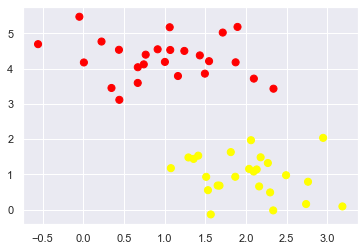

In [3]:
from sklearn.datasets import samples_generator
X, y = samples_generator.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


<h3 id="Linear-separability">Linear separability<a class="anchor-link" href="#Linear-separability">¶</a></h3>



<ul>
<li>We attempt to find a hyper-plane that cleanly separates the two classes.</li>
</ul>
\begin{equation}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p = 0
\end{equation}<ul>
<li><p>The hyper-plane has dimensions one less than the original feature space.</p>
</li>
<li><p>For two-dimensional data the hyper-plane is therefore simply a line:</p>
</li>
</ul>


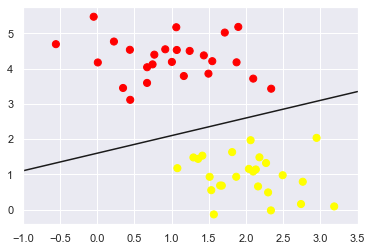

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot(xfit, 0.5 * xfit + 1.6, '-k')

plt.xlim(-1, 3.5);


<h3 id="Classification-using-hyperplanes">Classification using hyperplanes<a class="anchor-link" href="#Classification-using-hyperplanes">¶</a></h3><ul>
<li>We can classify the data according to which side of the hyper-plan a data-point lies on.</li>
</ul>
\begin{eqnarray}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p &amp; &gt; &amp; 0 \\
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p &amp; &lt; &amp; 0 \\
\end{eqnarray}<ul>
<li>That is, for a test observation $\mathbf{x}_j$ with $p$ features we can make predictions by examining the sign of:</li>
</ul>
\begin{equation}
f(\mathbf{x}) = \beta_0 + \beta_1 x_{j1} + \beta_2 x_{j2} + \ldots + \beta_p x_{jp}
\end{equation}



<h3 id="Model-selection">Model selection<a class="anchor-link" href="#Model-selection">¶</a></h3><ul>
<li><p>The problem of finding a separating hyper-plane does not have a unique solution.</p>
</li>
<li><p>Going back to our previous example, there are three <em>very</em> different separators which perfectly discriminate between these samples.</p>
</li>
</ul>



<h4 id="Model-selection-illustrated">Model selection illustrated<a class="anchor-link" href="#Model-selection-illustrated">¶</a></h4><ul>
<li><p>The point marked with a red cross represents out-of-sample data whose true label is $+1$.</p>
</li>
<li><p>However, depending on which model we choose, this observations will be assigned a different label.</p>
</li>
</ul>


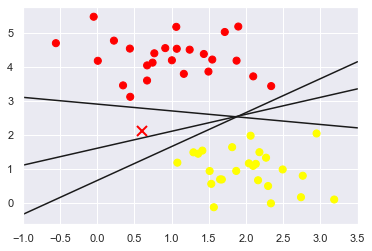

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);


<h3 id="The-Margin">The Margin<a class="anchor-link" href="#The-Margin">¶</a></h3><ul>
<li>Given a particular hyper-plane, we calculate a margin $M$ which is the distance from the hyper-plane to the nearest training input.</li>
</ul>


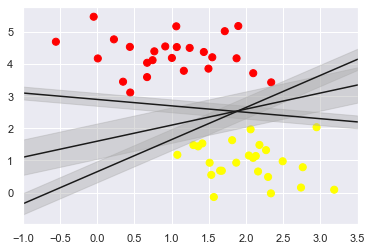

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);


<h3 id="Maximising-the-margin">Maximising the margin<a class="anchor-link" href="#Maximising-the-margin">¶</a></h3><ul>
<li><p>We can use $M$ to translate the classification into a loss-minimization problem with a unique solution.</p>
</li>
<li><p>First we will vectorize our equation for the hyperplane:</p>
</li>
</ul>
\begin{equation}
\mathbf{w} \cdot \mathbf{x} + b = 0
\end{equation}<ul>
<li><p>where the vector $\mathbf{w}$ is perpendicular to the plane.</p>
</li>
<li><p>For an observation $\mathbf{x}_i$ with label $y_i$, the distance to the hyperplane is:</p>
</li>
</ul>
\begin{equation}
D_i =   \frac{|\mathbf{w} \cdot \mathbf{x}_i + b|}{||\mathbf{w}||_2} 
\end{equation}<ul>
<li>The margin is the distance to the closest observation:</li>
</ul>
\begin{equation}
M = \min_i D_i
\end{equation}<ul>
<li>The optimal model is the hyper-plane that gives us the best separation, i.e. the maximum margin:</li>
</ul>
\begin{equation}
\mathbf{w}^* = \max_{\mathbf{w},b} M
\end{equation}



<h3 id="Predictions">Predictions<a class="anchor-link" href="#Predictions">¶</a></h3><ul>
<li><p>We can make predictions by examining the sign of $f(\mathbf{x}) = \mathbf{w}^T \cdot \mathbf{x} + b$.</p>
</li>
<li><p>To test against training data $\mathbf{y}$ we can examine the sign of the product $y_i f(\mathbf{x}_i)$.</p>
</li>
<li><p>Therefore the constraint that the classification is correct can be expressed:</p>
</li>
</ul>
\begin{equation}
y_i[\mathbf{w}^T \cdot \mathbf{x} + b] \geq 0
\end{equation}



<h3 id="Using-Scikit-learn-to-fit-a-linear-support-vector-machine">Using Scikit-learn to fit a linear support vector machine<a class="anchor-link" href="#Using-Scikit-learn-to-fit-a-linear-support-vector-machine">¶</a></h3>


In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')


<h3 id="The-fitted-model">The fitted model<a class="anchor-link" href="#The-fitted-model">¶</a></h3>


In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

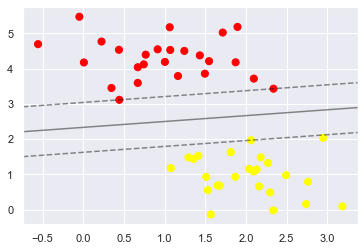

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=True);


<ul>
<li><p>This is the dividing line that maximizes the margin between the two sets of points.</p>
</li>
<li><p>Notice that a few of the training points just touch the margin.</p>
</li>
<li><p>These points are are known as the <em>support vectors</em>.</p>
</li>
</ul>



<h3 id="Support-vectors">Support-vectors<a class="anchor-link" href="#Support-vectors">¶</a></h3><ul>
<li>In Scikit-Learn, the identity of these points are stored in the <code>support_vectors_</code> attribute of the classifier:</li>
</ul>


In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])


<ul>
<li><p>Only the position of the support vectors matter</p>
</li>
<li><p>Any points further from the margin which are on the correct side do not modify the fit.</p>
</li>
<li><p>These points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.</p>
</li>
<li><p>We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:</p>
</li>
</ul>



<h3 id="Support-vector-machine-fit-with-different-training-sets">Support-vector machine fit with different training sets<a class="anchor-link" href="#Support-vector-machine-fit-with-different-training-sets">¶</a></h3>


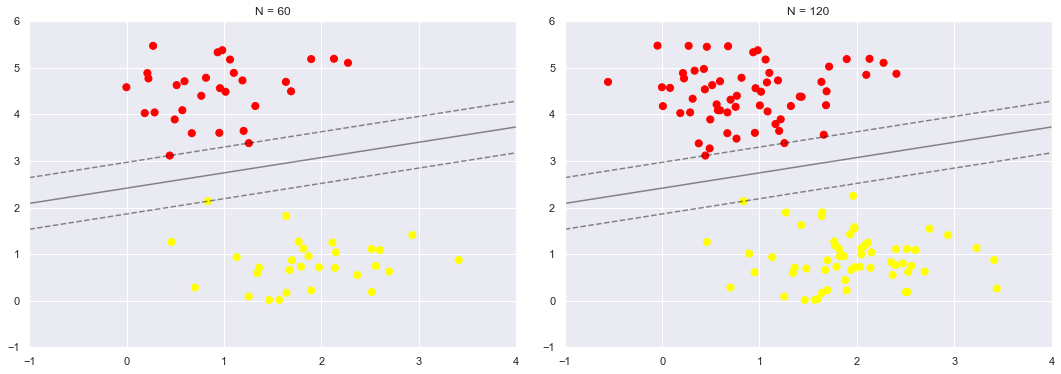

In [12]:
def plot_svm(N=10, ax=None):
    X, y = samples_generator.make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


<h3 id="Overlapping-data">Overlapping data<a class="anchor-link" href="#Overlapping-data">¶</a></h3><ul>
<li>Consider a data set that has some overlap, e.g.:</li>
</ul>


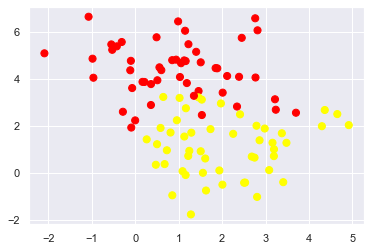

In [14]:
X, y = samples_generator.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


<h3 id="Soft-margins">Soft margins<a class="anchor-link" href="#Soft-margins">¶</a></h3><ul>
<li>We introduce a non-negative hyper-parameter $C$ which "softens" the margin, and our constraint becomes:</li>
</ul>
\begin{equation}
y_i (B_0 + B_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip})) \geq M(1 - \xi_i) \; \forall i \in \{1, \ldots, n\},
\end{equation}\begin{equation}
\xi_i \geq 0, \;  \sum_{i=1}^n \xi_i \leq C.
\end{equation}



<h3 id="Softening-the-margins">Softening the margins<a class="anchor-link" href="#Softening-the-margins">¶</a></h3>


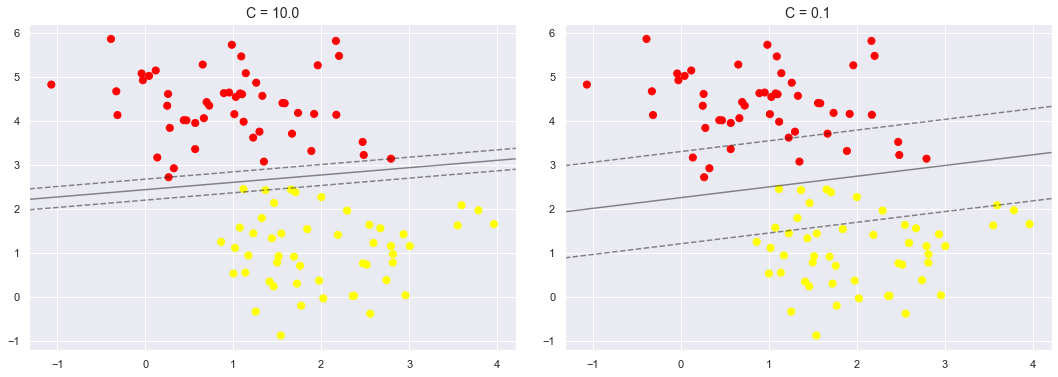

In [16]:
X, y = samples_generator.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)


<h3 id="SVM-as-constrained-optimization">SVM as constrained optimization<a class="anchor-link" href="#SVM-as-constrained-optimization">¶</a></h3><ul>
<li>Define the functional margin:</li>
</ul>
\begin{equation}
M = \min_i  y_i \left( \frac{\mathbf{w}}{ ||\mathbf{w}|| } \cdot \mathbf{x}_i + \frac{b}{||\mathbf{w}||} \right)
\end{equation}<ul>
<li>We want to solve</li>
</ul>
\begin{equation}
\max_{\mathbf{w}, b} M
\end{equation}<p>subject to:</p>
\begin{equation}
y_i \left( \frac{\mathbf{w}}{ ||\mathbf{w}|| } \cdot \mathbf{x}_i + \frac{b}{||\mathbf{w}||} \right) \geq M \; \forall i
\end{equation}



<h4 id="Eliminating-$M$">Eliminating $M$<a class="anchor-link" href="#Eliminating-$M$">¶</a></h4><p>Define</p>
\begin{equation}
F = \min_i y_i ( \mathbf{w} \cdot \mathbf{x}_i + b )
\end{equation}<p>Then the above constraint can be written:</p>
\begin{equation}
y_i ( \mathbf{w} \cdot \mathbf{x}_i + b ) \geq F \; \forall i
\end{equation}<ul>
<li>We can normalize by rescaling $\mathbf{w}$ so that $F=1$ which gives us $M = \frac{1}{||\mathbf{w}||}$.  </li>
</ul>



<h4 id="Reformulating-as-a-quadratic">Reformulating as a quadratic<a class="anchor-link" href="#Reformulating-as-a-quadratic">¶</a></h4><p>Our optimization problem is now:</p>
\begin{equation}
\max_{\mathbf{w},b} \frac{1}{||\mathbf{w}||}
\end{equation}<p>subject to:</p>
\begin{equation}
y_i(\mathbf{w} \cdot x + b) - 1 \geq 0 \; \forall i
\end{equation}<ul>
<li>This can be written as a quadratic optimization problem:</li>
</ul>
\begin{equation}
\min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2
\end{equation}<p>subject to the same constraint:</p>
\begin{equation}
y_i(\mathbf{w} \cdot x + b) - 1 \geq 0 \; \forall i
\end{equation}



<h4 id="Softening-the-margins">Softening the margins<a class="anchor-link" href="#Softening-the-margins">¶</a></h4>\begin{equation}
\min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2 + \frac{C}{n} \sum_i^n \xi_i
\end{equation}<p>subject to constraints:</p>
\begin{eqnarray*}
y_i(\mathbf{w} \cdot x + b) &amp; \geq &amp; 1 - \xi_i \; \forall i \\
\xi_i &amp; \geq &amp; 0 \; \forall i \\
\end{eqnarray*}



<h4 id="Standard-form">Standard form<a class="anchor-link" href="#Standard-form">¶</a></h4>\begin{equation}
\min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_i^n \xi_i
\end{equation}<p>subject to constraints:</p>
\begin{eqnarray*}
1 - \xi_i - y_i(\mathbf{w} \cdot x + b) &amp; \leq &amp; 0 \; \forall i \\
- \xi_i &amp; \leq &amp; 0 \; \forall i \\
\end{eqnarray*}



<h4 id="KKT-conditions">KKT conditions<a class="anchor-link" href="#KKT-conditions">¶</a></h4><p>\begin{equation}
\nabla f(\mathbf{x}^*) + \sum_{i=1}^m \lambda_i^* \nabla g_i(\mathbf{x}^*) + \sum_{i=1}^p v_i^* \nabla h_i(\mathbf{x}^*) = 0 
\end{equation}</p>
\begin{equation}
g_i(\mathbf{x}^*) \leq 0, \; i=1, \ldots, m
\end{equation}\begin{equation}
h_i(\mathbf{x}^*) = 0, \; \; i=1, \ldots, p
\end{equation}\begin{equation}
\lambda_i^* \geq 0, \; i=1, \ldots, m
\end{equation}\begin{equation}
\lambda_i^* g_i(\mathbf{x}^*) = 0, \; i=1, \ldots, m
\end{equation}



<h4 id="Lagrangian">Lagrangian<a class="anchor-link" href="#Lagrangian">¶</a></h4><p>Allocating Lagrange multipliers $\mathbf{\alpha}, \mathbf{\beta}$:</p>
\begin{eqnarray}
L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta}) 
&amp; = &amp; \frac{1}{2}\mathbf{w}^T\mathbf{w} + \frac{C}{n} \sum_{i=1} \xi_i  + \sum_{i=1}^n \alpha_i (1 - \xi_i - y_i(\mathbf{w}^T x_i + b)) - \sum_{i=1}^n \beta_i \xi_i \\
\end{eqnarray}



<h4 id="Lagrangian-dual">Lagrangian dual<a class="anchor-link" href="#Lagrangian-dual">¶</a></h4>\begin{equation}
L_{D}(\mathbf{\alpha}, \mathbf{\beta}) = \min_{\mathbf{w}, b, \xi_i} L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta})
\end{equation}<p>The dual optimization problem is:</p>
\begin{equation}
\max_{\mathbf{w}, b, \xi_i} L_D(\mathbf{\alpha}, \mathbf{\beta})
\end{equation}



<h4 id="KTT-conditions">KTT conditions<a class="anchor-link" href="#KTT-conditions">¶</a></h4>\begin{eqnarray}
L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta}) 
&amp; = &amp; \frac{1}{2}\mathbf{w}^T\mathbf{w} + \frac{C}{n} \sum_{i=1} \xi_i  + \sum_{i=1}^n \alpha_i (1 - \xi_i - y_i(\mathbf{w}^T x_i + b)) - \sum_{i=1}^n \beta_i \xi_i \\
\end{eqnarray}\begin{equation}
\nabla_\mathbf{w} L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta}) = \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i = 0 \\
\end{equation}\begin{equation}
\frac{\partial}{\partial b} L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta}) = - \sum_{i=1}^n \alpha_i y_i = 0 
\end{equation}\begin{equation}
\frac{\partial}{\partial b} L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\beta}) = \frac{C}{n} - \alpha_i - \beta_i = 0
\end{equation}



<h4 id="Substituting-into-the-dual">Substituting into the dual<a class="anchor-link" href="#Substituting-into-the-dual">¶</a></h4>\begin{equation}
L_D(\mathbf{\alpha}, \mathbf{\beta}) = - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \mathbf{x}_i ^ T \mathbf{x}_j + \sum_{i}^n \alpha_i
\end{equation}<ul>
<li>We can now write the dual optimization problem as:</li>
</ul>
\begin{equation}
\max_{\mathbf{\alpha}, \mathbf{\beta}} - \frac{1}{2} \sum_{i, j} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j + \sum_{i}^n \alpha_i
\end{equation}<p>subject to:</p>
\begin{eqnarray}
\sum_{i} \alpha_i y_i &amp; = &amp; 0 \\
\alpha_i + \beta_i &amp; = &amp; \frac{C}{n} \\
\alpha_i, \beta_i &amp; \geq &amp; 0 \; i=1, \ldots, n
\end{eqnarray}



<h4 id="As-a-quadratic-programming-problem">As a quadratic programming problem<a class="anchor-link" href="#As-a-quadratic-programming-problem">¶</a></h4><p>We an eliminate $\mathbf{\beta}$ to transform this into a quadratic programming problem:</p>
\begin{equation}
\max_{\mathbf{\alpha}} - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j + \sum_{i} \alpha_i 
\end{equation}<p>subject to:</p>
\begin{eqnarray}
\sum_i \alpha_i y_i &amp; = &amp; 0 \\
0 \leq \alpha_i \leq \frac{C}{n} \; i=1,\ldots,n \\
\end{eqnarray}<ul>
<li>This can be solved numerically using a quadratic optimizer to obtain $\mathbf{\alpha}^*$.</li>
</ul>



<h4 id="Optimal-weights">Optimal weights<a class="anchor-link" href="#Optimal-weights">¶</a></h4><ul>
<li>From KKT condition 1:</li>
</ul>
\begin{equation}
\mathbf{w}* - \sum_{i=1}^n \alpha_i^* y_i \mathbf{x}_i = 0
\end{equation}<p>Thus:</p>
\begin{equation}
\mathbf{w}* = \sum_{i=1} \alpha_i ^ * y_i \mathbf{x}_i
\end{equation}



<h4 id="Support-vectors">Support vectors<a class="anchor-link" href="#Support-vectors">¶</a></h4><ul>
<li>From KKT condition 5:</li>
</ul>
\begin{equation}
\alpha_i ^ * ( 1 - \xi_i^* - y_i ( \mathbf{w}^{*^T} \mathbf{x}_i + b^*)) = 0 
\end{equation}<ul>
<li><p>The data that satisfy these constraints are the support vectors.</p>
</li>
<li><p>By the KKT conditions, $\alpha_i^* \neq 0$ i.f.f. $\mathbf{x}_i$ is a support vector.</p>
</li>
<li><p>In typical learning problems only a small fraction of the training inputs are support vectors $S$.</p>
</li>
<li><p>Our classifier has a compact representation:</p>
</li>
</ul>
\begin{equation}
F(\mathbf{x}_j) = \operatorname{sign}( \sum_i \alpha_i^* y_i \mathbf{x}_j ^ T \mathbf{x}_i + b^*)
\end{equation}



<h3 id="Non-linearly-seperable-data">Non linearly-seperable data<a class="anchor-link" href="#Non-linearly-seperable-data">¶</a></h3>


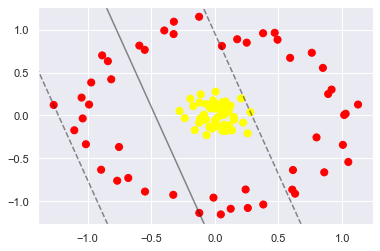

In [17]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


<h3 id="Radial-basis-functions">Radial basis functions<a class="anchor-link" href="#Radial-basis-functions">¶</a></h3>



<ul>
<li><p>We can project the data into higher dimensions to obtain linear-separability.</p>
</li>
<li><p>For example, we can use a radial basis function:</p>
</li>
</ul>


In [18]:
r = np.exp(-(X ** 2).sum(1))


<h3 id="Projection-into-three-dimensions">Projection into three dimensions<a class="anchor-link" href="#Projection-into-three-dimensions">¶</a></h3>


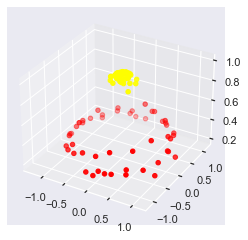

In [19]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='autumn')
plt.show()


<h3 id="Inner-products">Inner products<a class="anchor-link" href="#Inner-products">¶</a></h3><ul>
<li>The solution to the linear support-vector classifier optimization problem involves only the inner products of the observations:</li>
</ul>
\begin{equation}
\langle x_i, x_{i'} \rangle = \sum_{j=1}^p x_{ij}x_{i'j}
\end{equation}<ul>
<li>The linear SVC can thus be represented:</li>
</ul>
\begin{equation}
f(x) = \beta_0 + \sum_{i=1}^n \alpha_i \langle x, x_i \rangle
\end{equation}



<h3 id="The-kernel-trick">The kernel trick<a class="anchor-link" href="#The-kernel-trick">¶</a></h3><ul>
<li><p>A kernel is a function $\operatorname{k}(x_i, x_{i'})$ which quantifies the similarity of two observations:</p>
</li>
<li><p>The linear kernel is:</p>
</li>
</ul>
\begin{equation}
\operatorname{k}(x_i, x_{i'}) = \sum_{j=1}^p x_{ij}{x_{i'j}}
\end{equation}<ul>
<li><p>If we use centered and scaled data, it is equivalent to the Pearson correlation.</p>
</li>
<li><p>We can use non-linear kernels, e.g. polynomial of degree $d$:</p>
</li>
</ul>
\begin{equation}
\operatorname{k}(x_i, x_{i'}) = (1 + \sum_{j=1}^p x_{ij} x_{i'j})^d
\end{equation}



<h4 id="Kernel-trick-illustration">Kernel-trick illustration<a class="anchor-link" href="#Kernel-trick-illustration">¶</a></h4><p>Consider</p>
$$\phi(x)  = (1, \sqrt{2}x_1, \sqrt{2}x_2, x_1^2, x_2 ^ 2, \sqrt{2}x_1x_2) \\
\phi(z) = (1, \sqrt{2}z_1, \sqrt{2} z_2, z_1^2, z_2 ^ 2, \sqrt{2}z_1 z_2)$$\begin{eqnarray}
\phi(x) \cdot \phi(z) &amp; = &amp; 1 + 2 x_1 z_1 + 2 x_2 z_2 + x_1^2 z_1^2 + x_2 ^ 2 z_2 ^ 2 +  2 x_1 x_2 z_1 z_2 \\
&amp; = &amp; (1 + x_1 z_1 + x_2 z_2)^2 \\
&amp; = &amp; (1 + x.z)^2
\end{eqnarray}



<h3 id="Non-linear-kernels-in-scikit-learn">Non-linear kernels in scikit-learn<a class="anchor-link" href="#Non-linear-kernels-in-scikit-learn">¶</a></h3><p>To use the radial basis function kernel (RBF):</p>
\begin{equation}
\operatorname{k}(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\frac{||\mathbf{x}_i - \mathbf{x}_j || ^ 2}{2\sigma^2} \right)
\end{equation}


In [20]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)


<h3 id="Plotting-the-decision-boundary">Plotting the decision boundary<a class="anchor-link" href="#Plotting-the-decision-boundary">¶</a></h3><ul>
<li>We can plot the decision boundary in the unmapped space:</li>
</ul>


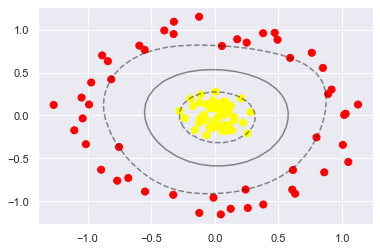

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


<h3 id="Modeling-high-frequency-limit-order-book-dynamics">Modeling high-frequency limit-order book dynamics<a class="anchor-link" href="#Modeling-high-frequency-limit-order-book-dynamics">¶</a></h3><ul>
<li><p>In Kercheval &amp; Zhang (2015) the feature vector consists of the prices and volumes on each side of the order-book.</p>
</li>
<li><p>The model is trained to predict the movement of the mid-price in the subsequent time period.</p>
</li>
</ul>
<p>Kercheval, A. N., &amp; Zhang, Y. (2015). Modelling high-frequency limit order book dynamics with support vector machines. Quantitative Finance, 15(8), 1315-1329.</p>



<h4 id="Categories">Categories<a class="anchor-link" href="#Categories">¶</a></h4><ol>
<li>Mid-price will move up</li>
<li>Mid-price will move down</li>
<li>Mid-price will stay the same</li>
</ol>



<h4 id="Features">Features<a class="anchor-link" href="#Features">¶</a></h4><p><img alt="features" src="figs/lob-features.png"/></p>
<p>(Kercheval and Zhang 2015)</p>



<h4 id="Results">Results<a class="anchor-link" href="#Results">¶</a></h4><p><img alt="ts" src="figs/lob-ts.png"/></p>



<h4 id="Validation">Validation<a class="anchor-link" href="#Validation">¶</a></h4><p><img alt="validation" src="figs/lob-validation.png"/></p>



<h2 id="The-Bayes-Classifier">The Bayes Classifier<a class="anchor-link" href="#The-Bayes-Classifier">¶</a></h2><ul>
<li><p>The Bayes Classifier is the theoretically-ideal classifier.</p>
</li>
<li><p>We know a-priori the probability distributions for each class $P(X|Y=j)$.</p>
</li>
<li><p>We assign each observation to the most likely class, given its predictor values.</p>
</li>
<li><p>For a given data point $\mathbf{x}_i$ we choose the label $j$ for which maximises:</p>
</li>
</ul>
\begin{equation}
Pr(Y = j | X = \mathbf{x}_i)
\end{equation}<h3 id="Bayes-Rule">Bayes Rule<a class="anchor-link" href="#Bayes-Rule">¶</a></h3>\begin{equation}
P(A|B) = \frac{P(B|A)}{P(A)}
\end{equation}<ul>
<li>For a binary classifier with mutually exclusive labels $Y=0$ or $Y=1$:</li>
</ul>
\begin{eqnarray}
Pr(Y = 1|X) &amp; = &amp; \frac{Pr(X|Y = 1) Pr(Y=1)}{Pr(X)} \\
\end{eqnarray}<ul>
<li>Under the assumption that predictors are independent we can use:</li>
</ul>
\begin{equation}
P(Y|X) = P(x_1 | Y) \times P(x_2|Y) \times \ldots \times P(x_n | Y) \times P(Y)
\end{equation}<ul>
<li>The above assumption is (sometimes) "naive", and gives us the name "Naive Bayes Classifier".</li>
</ul>



<h3 id="The-Bayes-Decision-Boundary">The Bayes Decision Boundary<a class="anchor-link" href="#The-Bayes-Decision-Boundary">¶</a></h3><ul>
<li><p>For a binary classification problem with mutually exclusive labels $Y=0$ or $Y=1$ we use the Bayes decision boundary:</p>
</li>
<li><p>For a binary classification task with two labels $Pr(Y=1) = 1 - Pr(Y=0)$.</p>
</li>
<li><p>Therefore the decision boundary is $\{ \mathbf{x}_i \in \mathbf{X} : P(Y=1|X=\mathbf{x}_i) &gt; 0.5 \}$.</p>
</li>
</ul>
\begin{equation}
Pr(Y = 1 | X) &gt; 0.5
\end{equation}<ul>
<li>To illustrate, we first generate data using known conditional probabilities:</li>
</ul>


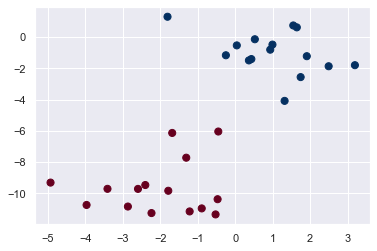

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(30, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');


<h3 id="Plotting-the-decision-boundary">Plotting the decision boundary<a class="anchor-link" href="#Plotting-the-decision-boundary">¶</a></h3>


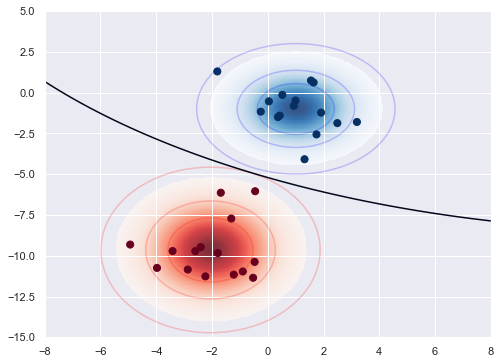

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(30, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots(figsize=(8,6))
#plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 600)
yg = np.linspace(ylim[0], ylim[1], 400)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
PL = np.zeros((2, len(Xgrid)))
for label, color in enumerate(['red', 'blue']): #, 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1) 
    PL[label, :] = P[:]
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.8,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.2, 0.5],
               colors=color, alpha=0.2)
    
conditional =  (PL[1, :] / PL[0, :])
plt.contour(xx, yy, conditional.reshape(xx.shape), levels=[0.5])    

#ax.set(xlim=xlim, ylim=ylim)
plt.show()


<h3 id="Naive-Gaussian-Bayes-Classifier">Naive Gaussian-Bayes Classifier<a class="anchor-link" href="#Naive-Gaussian-Bayes-Classifier">¶</a></h3><ul>
<li><p>We can make assumptions about the model for each label.</p>
</li>
<li><p>In a Gaussian Naive Bayes classification we <em>assume</em> that data for each feature are i.i.d. distributed from a Gaussian distribution:</p>
</li>
</ul>
\begin{equation}
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp \left( - \frac{(x_i - \mu_y)^2}{2 \sigma^2{y}} \right)
\end{equation}<ul>
<li><p>The mean and variance can be estimated from sample mean and sample variance.</p>
</li>
<li><p>In scikit-learn:</p>
</li>
</ul>


In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


<h4 id="Predictions">Predictions<a class="anchor-link" href="#Predictions">¶</a></h4><ul>
<li>We can now predict the label for new observations:</li>
</ul>


In [25]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


<h4 id="Decision-boundary">Decision boundary<a class="anchor-link" href="#Decision-boundary">¶</a></h4>


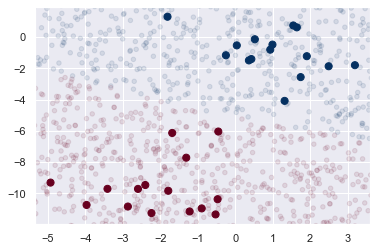

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


<h4 id="Predicted-posterior-probabilities">Predicted posterior probabilities<a class="anchor-link" href="#Predicted-posterior-probabilities">¶</a></h4>


In [27]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02]])


<h2 id="K-Nearest-Neighbors">K-Nearest Neighbors<a class="anchor-link" href="#K-Nearest-Neighbors">¶</a></h2><ul>
<li><p>In general we do not know a-priori the actual conditional probabilities.</p>
</li>
<li><p>Therefore we have to <em>estimate</em> them.</p>
</li>
<li><p>With K-nearest neighbors (KNN) we first identify the $K$ points in the training data that are closest to a given training data $x_0$, e.g. using an Euclidian distance metric.</p>
</li>
<li><p>We then estimate the conditional probability as a sample mean:</p>
</li>
</ul>
\begin{equation}
Pr(Y = j| X = x_0) = \frac{1}{K} \sum_{i \in N_0} I(y_i = j)
\end{equation}



<h3 id="KNN-example-for-$K=3$">KNN example for $K=3$<a class="anchor-link" href="#KNN-example-for-$K=3$">¶</a></h3>


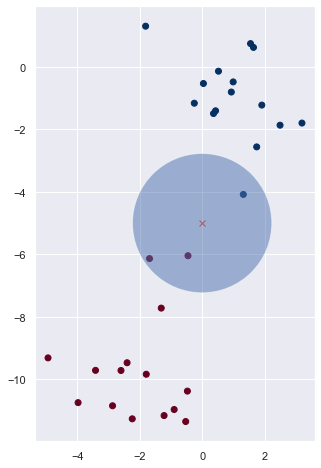

In [28]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')
test_x = np.array([0, -5])
ax.plot(test_x[0], test_x[1], 'x', color='r')
plt.gca().set_aspect('equal', adjustable='box')
K = 3
distances = np.sum((test_x - X)**2, axis=1)
N = np.argsort(distances)[:K]
max_dist = np.sqrt(np.sort(distances)[K-1])
#plt.plot(X[N][:, 0], X[N][:, 1], 'x')
max_dist
ax.add_artist(plt.Circle(test_x, max_dist+0.2, alpha=0.5))
plt.show()


<h1 id="Logistic-regression">Logistic regression<a class="anchor-link" href="#Logistic-regression">¶</a></h1><ul>
<li>So far we have modelled dependent variables as deterministic quantities.</li>
<li>In many applications we want to forecast probabilities, e.g. probability of default.</li>
</ul>



<h2 id="Credit-data-set">Credit data set<a class="anchor-link" href="#Credit-data-set">¶</a></h2>


In [ ]:
df = pd.read_excel('data/Default.xlsx')

df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df[['default', 'student', 'balance', 'income']].head(5)

In [29]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 5.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



<h2 id="Credit-data-set:-visualisation">Credit data-set: visualisation<a class="anchor-link" href="#Credit-data-set:-visualisation">¶</a></h2>


In [ ]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())


<h2 id="Dummy-variables-and-probabilities">Dummy variables and probabilities<a class="anchor-link" href="#Dummy-variables-and-probabilities">¶</a></h2><ul>
<li><p>We could map labels onto integers, but we have to take great care as labels have no meaningful intrinsic ordering.</p>
</li>
<li><p>For a binary classifier with only two labels we can use dummy variables by transforming the labels onto 0 and 1.</p>
</li>
<li><p>We can straightforwardly use dummy-variables for predictors.</p>
</li>
<li><p>We often try to interpret the real-valued response as a <em>probability</em>.</p>
</li>
</ul>



<h2 id="Probabilities-are-not-linear-in-predictors">Probabilities are not linear in predictors<a class="anchor-link" href="#Probabilities-are-not-linear-in-predictors">¶</a></h2><ul>
<li>Naively, we might attempt to fit a model of the form:</li>
</ul>
$$p(X) = \beta_0 + \beta_1 X$$<ul>
<li>However, this will give nonsensical results.</li>
</ul>


In [ ]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}) #, ax=ax1)
plt.show()


<h2 id="Logistic-regression-assumptions">Logistic regression assumptions<a class="anchor-link" href="#Logistic-regression-assumptions">¶</a></h2><ul>
<li>We use a sigmoid function:</li>
</ul>
\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}<ul>
<li>for a single training pair $(\mathbf{x}, y)$, we assume:</li>
</ul>
\begin{equation}
P(Y=1 | \mathbf{X}=\mathbf{x}) = \sigma(z)
\end{equation}<p>where:</p>
\begin{equation}
z = w_0 + \sum_{i=1}^m w_i x_i
\end{equation}



<h2 id="Vectorized-conditional-probabilities">Vectorized conditional probabilities<a class="anchor-link" href="#Vectorized-conditional-probabilities">¶</a></h2>\begin{eqnarray}
P(Y=1 | \mathbf{X} = \mathbf{x}) &amp; = &amp; \sigma(\mathbf{w}^T \mathbf{x}) \\
P(Y=0 | \mathbf{X} = \mathbf{x}) &amp; = &amp; 1 - \sigma(\mathbf{w}^T \mathbf{x}) \\
\end{eqnarray}<p>If the labels are 0 and 1, then $Y$ is a Bernoulli random variable $Y \sim Ber(p)$ where $p = \sigma(\mathbf{w}^T \mathbf{x})$, therefore:</p>
\begin{equation}
P(Y = y| X = \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x})^y \cdot \left[1 - \sigma(\mathbf{w}^T \mathbf{x}) \right] ^{(1 - y)}
\end{equation}



<h2 id="Likelihood-function">Likelihood function<a class="anchor-link" href="#Likelihood-function">¶</a></h2>\begin{eqnarray*}
L(\mathbf{w}) &amp; = &amp; \prod_{i=1}^n P(Y = y_i | X = \mathbf{x}_i) \\
L(\mathbf{w}) &amp; = &amp; \prod_{i=1}^n \sigma(\mathbf{w}^T \mathbf{x}_i)^y \cdot \left[1 - \sigma(\mathbf{w}^T \mathbf{x}_i) \right] ^{(1 - y)}
\end{eqnarray*}



<h2 id="Log-likelihood-function">Log-likelihood function<a class="anchor-link" href="#Log-likelihood-function">¶</a></h2>\begin{eqnarray*}
LL(\mathbf{w}) = \sum_{i=1}^n y_i \log \sigma(\mathbf{w}^T \mathbf{x}_i)^y  \log \left[1 - \sigma(\mathbf{w}^T \mathbf{x}_i) \right]
\end{eqnarray*}<ul>
<li><p>To obtain optimal weights we maximise the above, which gives us the maximum likelihood estimate (MLE).</p>
</li>
<li><p>Provided that the data are not separated, this function is concave and can be solved numerically using gradient ascent.</p>
</li>
</ul>



<h2 id="Gradient-function">Gradient function<a class="anchor-link" href="#Gradient-function">¶</a></h2>\begin{equation}
\frac{\partial LL(\mathbf{w})}{\partial w_j} = \sum_{i=1}^n \left[ y_i - \sigma(\mathbf{w}^T \mathbf{x}_i) \right] x_{ij}
\end{equation}



<h2 id="Logistic-regression-in-scikit-learn">Logistic regression in scikit-learn<a class="anchor-link" href="#Logistic-regression-in-scikit-learn">¶</a></h2>


In [31]:
from sklearn.linear_model import LogisticRegression

logistic = skl_lm.LogisticRegression(solver='newton-cg')
logistic.fit(X_train, y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

NameError: name 'X_train' is not defined


<h3 id="Probability-of-default">Probability of default<a class="anchor-link" href="#Probability-of-default">¶</a></h3>


In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_train, y, color='orange')
plt.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)
    
y = df.default2
X_train = df.balance.values.reshape(-1,1)

plt.show()


<h1 id="Bibliography">Bibliography<a class="anchor-link" href="#Bibliography">¶</a></h1><p>Bianchi, D., &amp; McAlinn, K. (2020). Divide and Conquer: Financial Ratios and Industry Returns Predictability (No. 3136368; SSRN). <a href="https://doi.org/10.2139/ssrn.3136368">https://doi.org/10.2139/ssrn.3136368</a></p>
<p>Bhattacharyya, S., Jha, S., Tharakunnel, K., &amp; Westland, J. C. (2011). Data mining for credit card fraud: A comparative study. Decision Support Systems, 50(3), 602-613.</p>
<p>Doumpos, M., &amp; Zopounidis, C. (2002). Classification problems in finance. Multicriteria Decision Aid Classification Methods, 159-224.</p>
<p>Friedman, J., Hastie, T., &amp; Tibshirani, R. (2001). The elements of statistical learning (Vol. 1, No. 10). New York: Springer series in statistics.</p>
<p>Gilli, M., Maringer, D., &amp; Winker, P. (2008). Applications of heuristics in finance. In Handbook on information technology in finance (pp. 635-653). Springer, Berlin, Heidelberg.</p>
<p>James, G., Witten, D., Hastie, T., &amp; Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, pp. 3-7). New York: Springer.</p>
<p>Kercheval, A. N., &amp; Zhang, Y. (2015). Modelling high-frequency limit order book dynamics with support vector machines. Quantitative Finance, 15(8), 1315-1329.</p>
<p>Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.</p>
<p>VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".</p>
<h3 id="Acknowledgements">Acknowledgements<a class="anchor-link" href="#Acknowledgements">¶</a></h3><p>Some of the materials from the above adapted for these notes under <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA 4.0</a>.</p>
